# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from deep_translator import GoogleTranslator

# Data

In [2]:
df = pd.read_excel('h22index-42.xlsx', na_values=[r'-', r'–', r'－'], header=1, skipfooter=6, parse_dates = True)

In [3]:
df.head()

Unnamed: 0   キャベツ  ねぎ     レタス  ばれいしょ  たまねぎ  きゅうり    トマト  ほうれんそう  にんじん  \
0   平成29年11月6日の週  171.0 NaN   763.0    NaN   NaN   NaN  783.0     NaN   NaN   
1  平成29年11月13日の週  198.0 NaN   909.0    NaN   NaN   NaN  771.0     NaN   NaN   
2  平成29年11月20日の週  196.0 NaN   873.0    NaN   NaN   NaN  757.0     NaN   NaN   
3  平成29年11月27日の週  207.0 NaN   969.0    NaN   NaN   NaN  762.0     NaN   NaN   
4   平成29年12月4日の週  221.0 NaN  1109.0    NaN   NaN   NaN  794.0     NaN   NaN   

    はくさい   だいこん  なす  
0  189.0  192.0 NaN  
1  195.0  190.0 NaN  
2  209.0  190.0 NaN  
3  236.0  204.0 NaN  
4  243.0  215.0 NaN

In [4]:
df.tail()

Unnamed: 0   キャベツ     ねぎ    レタス  ばれいしょ   たまねぎ   きゅうり    トマト  ほうれんそう  \
244   令和4年9月19日の週  141.0  854.0  580.0  380.0  311.0  591.0  867.0     NaN   
245   令和4年9月26日の週  157.0  855.0  560.0  375.0  303.0  602.0  878.0     NaN   
246   令和4年10月3日の週  162.0  814.0  545.0    NaN  298.0    NaN  897.0     NaN   
247  令和4年10月10日の週  173.0  791.0  556.0    NaN  291.0    NaN  913.0     NaN   
248  令和4年10月17日の週  167.0  785.0  533.0    NaN  283.0    NaN  910.0     NaN   

      にんじん   はくさい   だいこん  なす  
244  544.0    NaN    NaN NaN  
245  527.0    NaN    NaN NaN  
246  508.0  234.0  255.0 NaN  
247  480.0  239.0  251.0 NaN  
248  479.0  236.0  228.0 NaN

# Translate

- Translating Column Names

In [5]:
translator = GoogleTranslator(src='japanese', dest='en')

In [6]:
df.rename(columns=translator.translate, inplace=True)

In [7]:
df

Unnamed: 0  cabbage  green onion  lettuce  potatoes  onion  Cucumber  \
0     平成29年11月6日の週    171.0          NaN    763.0       NaN    NaN       NaN   
1    平成29年11月13日の週    198.0          NaN    909.0       NaN    NaN       NaN   
2    平成29年11月20日の週    196.0          NaN    873.0       NaN    NaN       NaN   
3    平成29年11月27日の週    207.0          NaN    969.0       NaN    NaN       NaN   
4     平成29年12月4日の週    221.0          NaN   1109.0       NaN    NaN       NaN   
..             ...      ...          ...      ...       ...    ...       ...   
244    令和4年9月19日の週    141.0        854.0    580.0     380.0  311.0     591.0   
245    令和4年9月26日の週    157.0        855.0    560.0     375.0  303.0     602.0   
246    令和4年10月3日の週    162.0        814.0    545.0       NaN  298.0       NaN   
247   令和4年10月10日の週    173.0        791.0    556.0       NaN  291.0       NaN   
248   令和4年10月17日の週    167.0        785.0    533.0       NaN  283.0       NaN   

     tomato  spinach  Carrot  Chinese cabbage  Radish  eggplant  
0     783.0      NaN     NaN            189.0   192.0       NaN  
1     771.0      NaN     NaN            195.0   190.0       NaN  
2     757.0      NaN     NaN            209.0   190.0       NaN  
3     762.0      NaN     NaN            236.0   204.0       NaN  
4     794.0      NaN     NaN            243.0   215.0       NaN  
..      ...      ...     ...              ...     ...       ...  
244   867.0      NaN   544.0              NaN     NaN       NaN  
245   878.0      NaN   527.0              NaN     NaN       NaN  
246   897.0      NaN   508.0            234.0   255.0       NaN  
247   913.0      NaN   480.0            239.0   251.0       NaN  
248   910.0      NaN   479.0            236.0   228.0       NaN  

[249 rows x 13 columns]

- Translating First Column Values

In [8]:
df['Unnamed: 0'] = df['Unnamed: 0'].apply(translator.translate)
df

Unnamed: 0  cabbage  green onion  lettuce  potatoes  \
0      Week of November 6, 2017    171.0          NaN    763.0       NaN   
1     Week of November 13, 2017    198.0          NaN    909.0       NaN   
2     Week of November 20, 2017    196.0          NaN    873.0       NaN   
3     Week of November 27, 2017    207.0          NaN    969.0       NaN   
4      Week of December 4, 2017    221.0          NaN   1109.0       NaN   
..                          ...      ...          ...      ...       ...   
244  Week of September 19, 2022    141.0        854.0    580.0     380.0   
245  Week of September 26, 2022    157.0        855.0    560.0     375.0   
246     Week of October 3, 2022    162.0        814.0    545.0       NaN   
247    Week of October 10, 2022    173.0        791.0    556.0       NaN   
248    Week of October 17, 2020    167.0        785.0    533.0       NaN   

     onion  Cucumber  tomato  spinach  Carrot  Chinese cabbage  Radish  \
0      NaN       NaN   783.0      NaN     NaN            189.0   192.0   
1      NaN       NaN   771.0      NaN     NaN            195.0   190.0   
2      NaN       NaN   757.0      NaN     NaN            209.0   190.0   
3      NaN       NaN   762.0      NaN     NaN            236.0   204.0   
4      NaN       NaN   794.0      NaN     NaN            243.0   215.0   
..     ...       ...     ...      ...     ...              ...     ...   
244  311.0     591.0   867.0      NaN   544.0              NaN     NaN   
245  303.0     602.0   878.0      NaN   527.0              NaN     NaN   
246  298.0       NaN   897.0      NaN   508.0            234.0   255.0   
247  291.0       NaN   913.0      NaN   480.0            239.0   251.0   
248  283.0       NaN   910.0      NaN   479.0            236.0   228.0   

     eggplant  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
244       NaN  
245       NaN  
246       NaN  
247       NaN  
248       NaN  

[249 rows x 13 columns]

In [9]:
# It seems that first column contains dates. So we can change the name of the column as Date. 
# Also we can make some changes on column names for easy use

df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df.columns = df.columns.str.title()
df.columns = df.columns.str.replace(' ','_')
df.head()

Date  Cabbage  Green_Onion  Lettuce  Potatoes  Onion  \
0   Week of November 6, 2017    171.0          NaN    763.0       NaN    NaN   
1  Week of November 13, 2017    198.0          NaN    909.0       NaN    NaN   
2  Week of November 20, 2017    196.0          NaN    873.0       NaN    NaN   
3  Week of November 27, 2017    207.0          NaN    969.0       NaN    NaN   
4   Week of December 4, 2017    221.0          NaN   1109.0       NaN    NaN   

   Cucumber  Tomato  Spinach  Carrot  Chinese_Cabbage  Radish  Eggplant  
0       NaN   783.0      NaN     NaN            189.0   192.0       NaN  
1       NaN   771.0      NaN     NaN            195.0   190.0       NaN  
2       NaN   757.0      NaN     NaN            209.0   190.0       NaN  
3       NaN   762.0      NaN     NaN            236.0   204.0       NaN  
4       NaN   794.0      NaN     NaN            243.0   215.0       NaN

In [10]:
# Extracting date string from the translated first column values

col = [date[8:] for date in df['Date']]
col[0:3]

['November 6, 2017', 'November 13, 2017', 'November 20, 2017']

In [11]:
# Converting strings to Date Format

df['Date'] = pd.to_datetime(col, format='%B %d, %Y')
df.head()

Date  Cabbage  Green_Onion  Lettuce  Potatoes  Onion  Cucumber  \
0 2017-11-06    171.0          NaN    763.0       NaN    NaN       NaN   
1 2017-11-13    198.0          NaN    909.0       NaN    NaN       NaN   
2 2017-11-20    196.0          NaN    873.0       NaN    NaN       NaN   
3 2017-11-27    207.0          NaN    969.0       NaN    NaN       NaN   
4 2017-12-04    221.0          NaN   1109.0       NaN    NaN       NaN   

   Tomato  Spinach  Carrot  Chinese_Cabbage  Radish  Eggplant  
0   783.0      NaN     NaN            189.0   192.0       NaN  
1   771.0      NaN     NaN            195.0   190.0       NaN  
2   757.0      NaN     NaN            209.0   190.0       NaN  
3   762.0      NaN     NaN            236.0   204.0       NaN  
4   794.0      NaN     NaN            243.0   215.0       NaN

In [12]:
df.tail()

Date  Cabbage  Green_Onion  Lettuce  Potatoes  Onion  Cucumber  \
244 2022-09-19    141.0        854.0    580.0     380.0  311.0     591.0   
245 2022-09-26    157.0        855.0    560.0     375.0  303.0     602.0   
246 2022-10-03    162.0        814.0    545.0       NaN  298.0       NaN   
247 2022-10-10    173.0        791.0    556.0       NaN  291.0       NaN   
248 2020-10-17    167.0        785.0    533.0       NaN  283.0       NaN   

     Tomato  Spinach  Carrot  Chinese_Cabbage  Radish  Eggplant  
244   867.0      NaN   544.0              NaN     NaN       NaN  
245   878.0      NaN   527.0              NaN     NaN       NaN  
246   897.0      NaN   508.0            234.0   255.0       NaN  
247   913.0      NaN   480.0            239.0   251.0       NaN  
248   910.0      NaN   479.0            236.0   228.0       NaN

In [13]:
# Setting "Date" column as the index to have an ordered time-series.

df.set_index(keys='Date', inplace=True)
df.head()

Cabbage  Green_Onion  Lettuce  Potatoes  Onion  Cucumber  Tomato  \
Date                                                                           
2017-11-06    171.0          NaN    763.0       NaN    NaN       NaN   783.0   
2017-11-13    198.0          NaN    909.0       NaN    NaN       NaN   771.0   
2017-11-20    196.0          NaN    873.0       NaN    NaN       NaN   757.0   
2017-11-27    207.0          NaN    969.0       NaN    NaN       NaN   762.0   
2017-12-04    221.0          NaN   1109.0       NaN    NaN       NaN   794.0   

            Spinach  Carrot  Chinese_Cabbage  Radish  Eggplant  
Date                                                            
2017-11-06      NaN     NaN            189.0   192.0       NaN  
2017-11-13      NaN     NaN            195.0   190.0       NaN  
2017-11-20      NaN     NaN            209.0   190.0       NaN  
2017-11-27      NaN     NaN            236.0   204.0       NaN  
2017-12-04      NaN     NaN            243.0   215.0       NaN

# Preprocessing

#### - Checking Missing Values

In [14]:
df.isna().sum()

Cabbage              2
Green_Onion         72
Lettuce              2
Potatoes           125
Onion               47
Cucumber           126
Tomato               2
Spinach            199
Carrot             146
Chinese_Cabbage    125
Radish             118
Eggplant           200
dtype: int64

- In total, we have 249 records in our dataset.
    - When we observe missing values, we can see that `Eggplant` and `Spinach` have the most missing values with 200 and 199 respectively.
    - `Carrots` has 146 missing values which is approximately 60% of the records.
    - `Chinese_Cabbage`, `Radish`, `Cucumber`, and `Potatoes` have closer in terms of their number of missing values.

#### - Checking Missing Indexes

In [15]:
# check for missing dates in the index

missing_weeks = pd.date_range(start='2017-11-06', end='2022-10-10', freq='W-MON').difference(df.index)
print(f'The missing weeks in the dataset are:\n{missing_weeks}')

The missing weeks in the dataset are:
DatetimeIndex(['2018-01-01', '2018-04-30', '2018-12-31', '2019-04-29',
               '2019-12-30', '2020-05-04', '2020-12-28', '2021-05-03',
               '2021-12-27', '2022-04-04', '2022-05-02', '2022-06-20',
               '2022-07-04'],
              dtype='datetime64[ns]', freq=None)


- As we can observe there are some missing weeks in our dataset. They might have happened for many reasons like the Covid pandemic, and the lack of information.

#### - Checking rows which have null values

In [16]:
# check if any row has missing value for all columns
df[df.isnull().all(axis=1)]

Cabbage  Green_Onion  Lettuce  Potatoes  Onion  Cucumber  Tomato  \
Date                                                                           
2020-04-20      NaN          NaN      NaN       NaN    NaN       NaN     NaN   
2020-04-27      NaN          NaN      NaN       NaN    NaN       NaN     NaN   

            Spinach  Carrot  Chinese_Cabbage  Radish  Eggplant  
Date                                                            
2020-04-20      NaN     NaN              NaN     NaN       NaN  
2020-04-27      NaN     NaN              NaN     NaN       NaN

- Also, there are 2 weeks that don't have any values for any variables.

#### - Adding missing weeks into dataframe

In [17]:
# build a temporary dataframe with missing weeks as index
# and the same columns as the main dataset
tmp_df = pd.DataFrame(index=missing_weeks, columns=df.columns)

# concat this temporary dataframe to the main dataset
df = pd.concat([df, tmp_df])

# sort the dataframe according to the index
df.sort_index(inplace=True)

# set index to weekly period with 'Monday' as the starting day of the week
df.index.to_period('W-MON')         

df.head()

Cabbage  Green_Onion  Lettuce  Potatoes  Onion  Cucumber  Tomato  \
2017-11-06    171.0          NaN    763.0       NaN    NaN       NaN   783.0   
2017-11-13    198.0          NaN    909.0       NaN    NaN       NaN   771.0   
2017-11-20    196.0          NaN    873.0       NaN    NaN       NaN   757.0   
2017-11-27    207.0          NaN    969.0       NaN    NaN       NaN   762.0   
2017-12-04    221.0          NaN   1109.0       NaN    NaN       NaN   794.0   

            Spinach  Carrot  Chinese_Cabbage  Radish  Eggplant  
2017-11-06      NaN     NaN            189.0   192.0       NaN  
2017-11-13      NaN     NaN            195.0   190.0       NaN  
2017-11-20      NaN     NaN            209.0   190.0       NaN  
2017-11-27      NaN     NaN            236.0   204.0       NaN  
2017-12-04      NaN     NaN            243.0   215.0       NaN

#### - Visualizing Missing Values

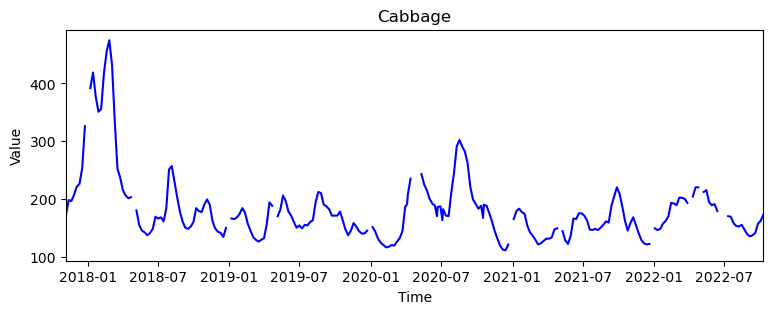

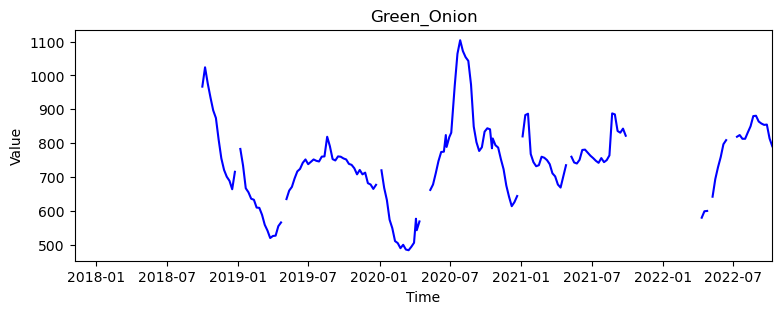

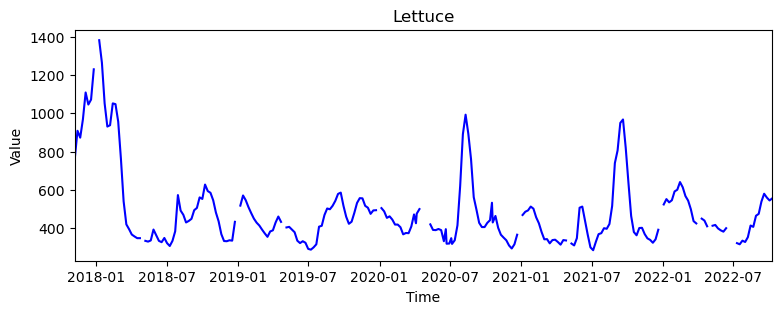

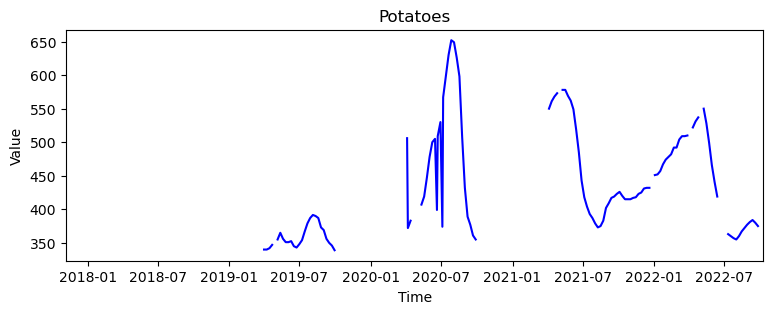

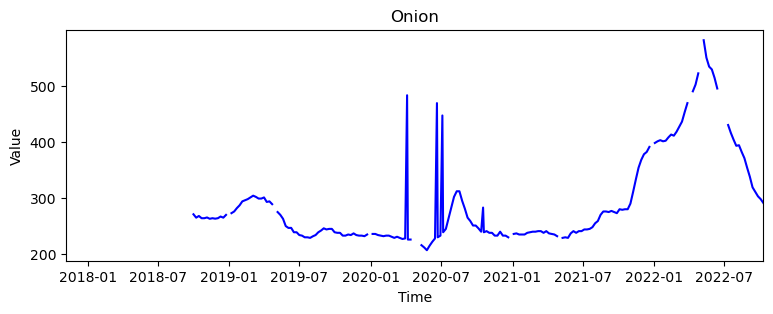

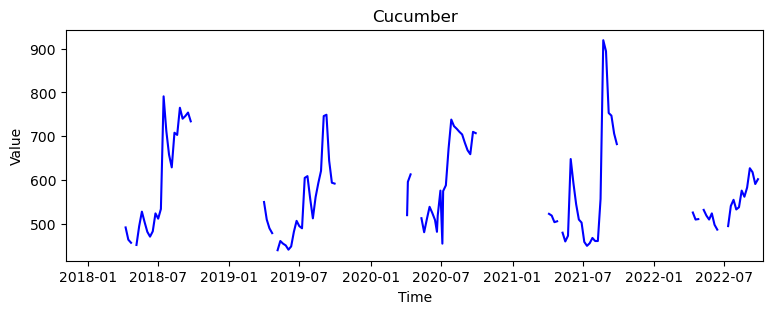

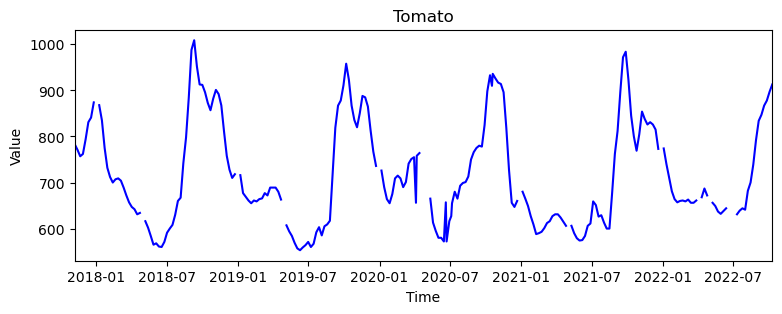

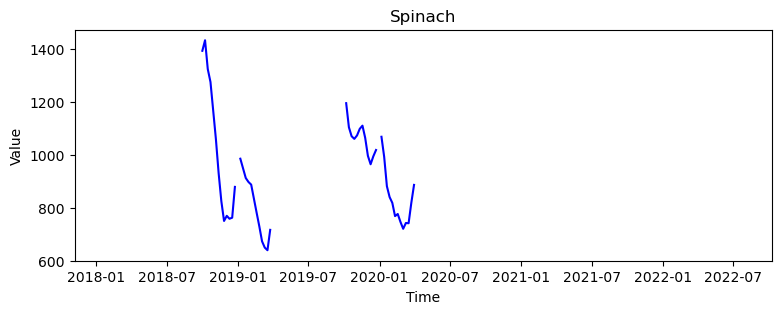

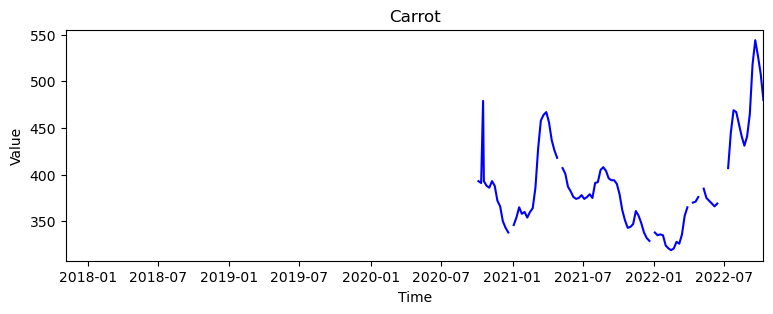

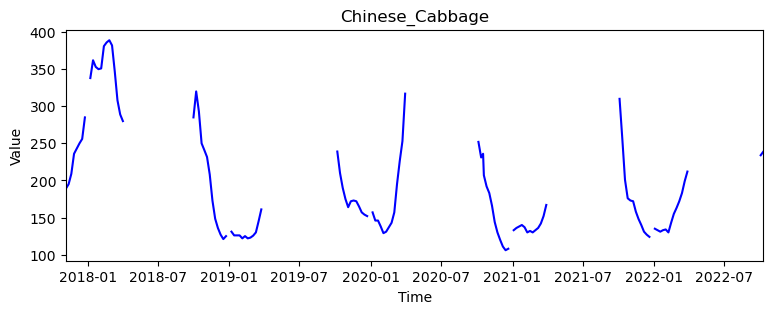

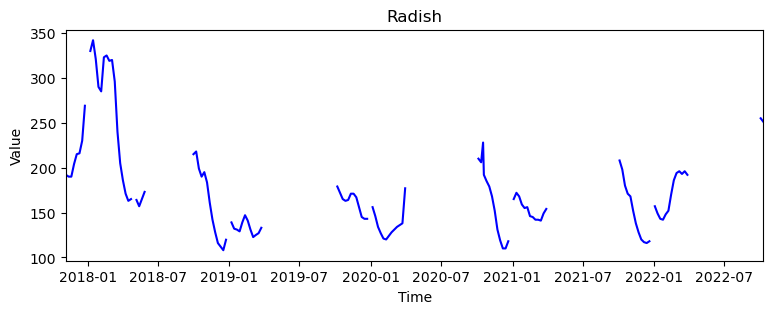

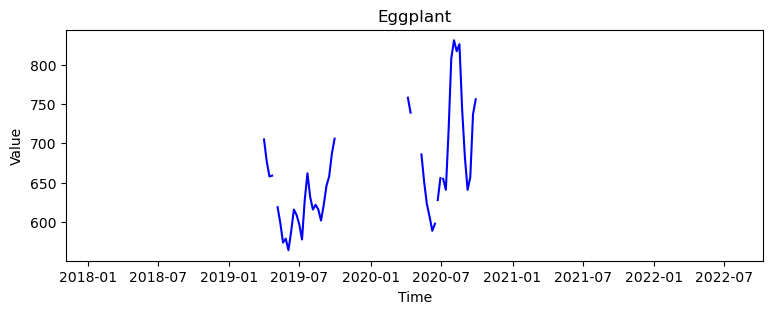

In [18]:
# Plotting Variables through time

for column in df.columns:
    
    # set the size of our plot
    plt.rcParams['figure.figsize']=(9,3)
    
    # Determine the start and end dates of the time period that includes the missing values in a time series plot
    start_date = df.index.min()
    end_date = df.index.max()

    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    
    # plots our series
    plt.plot(df[column], color='blue')
    
    # adds title to our time series plot
    plt.title(column) 
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # print the plot
    plt.show()

<AxesSubplot:>

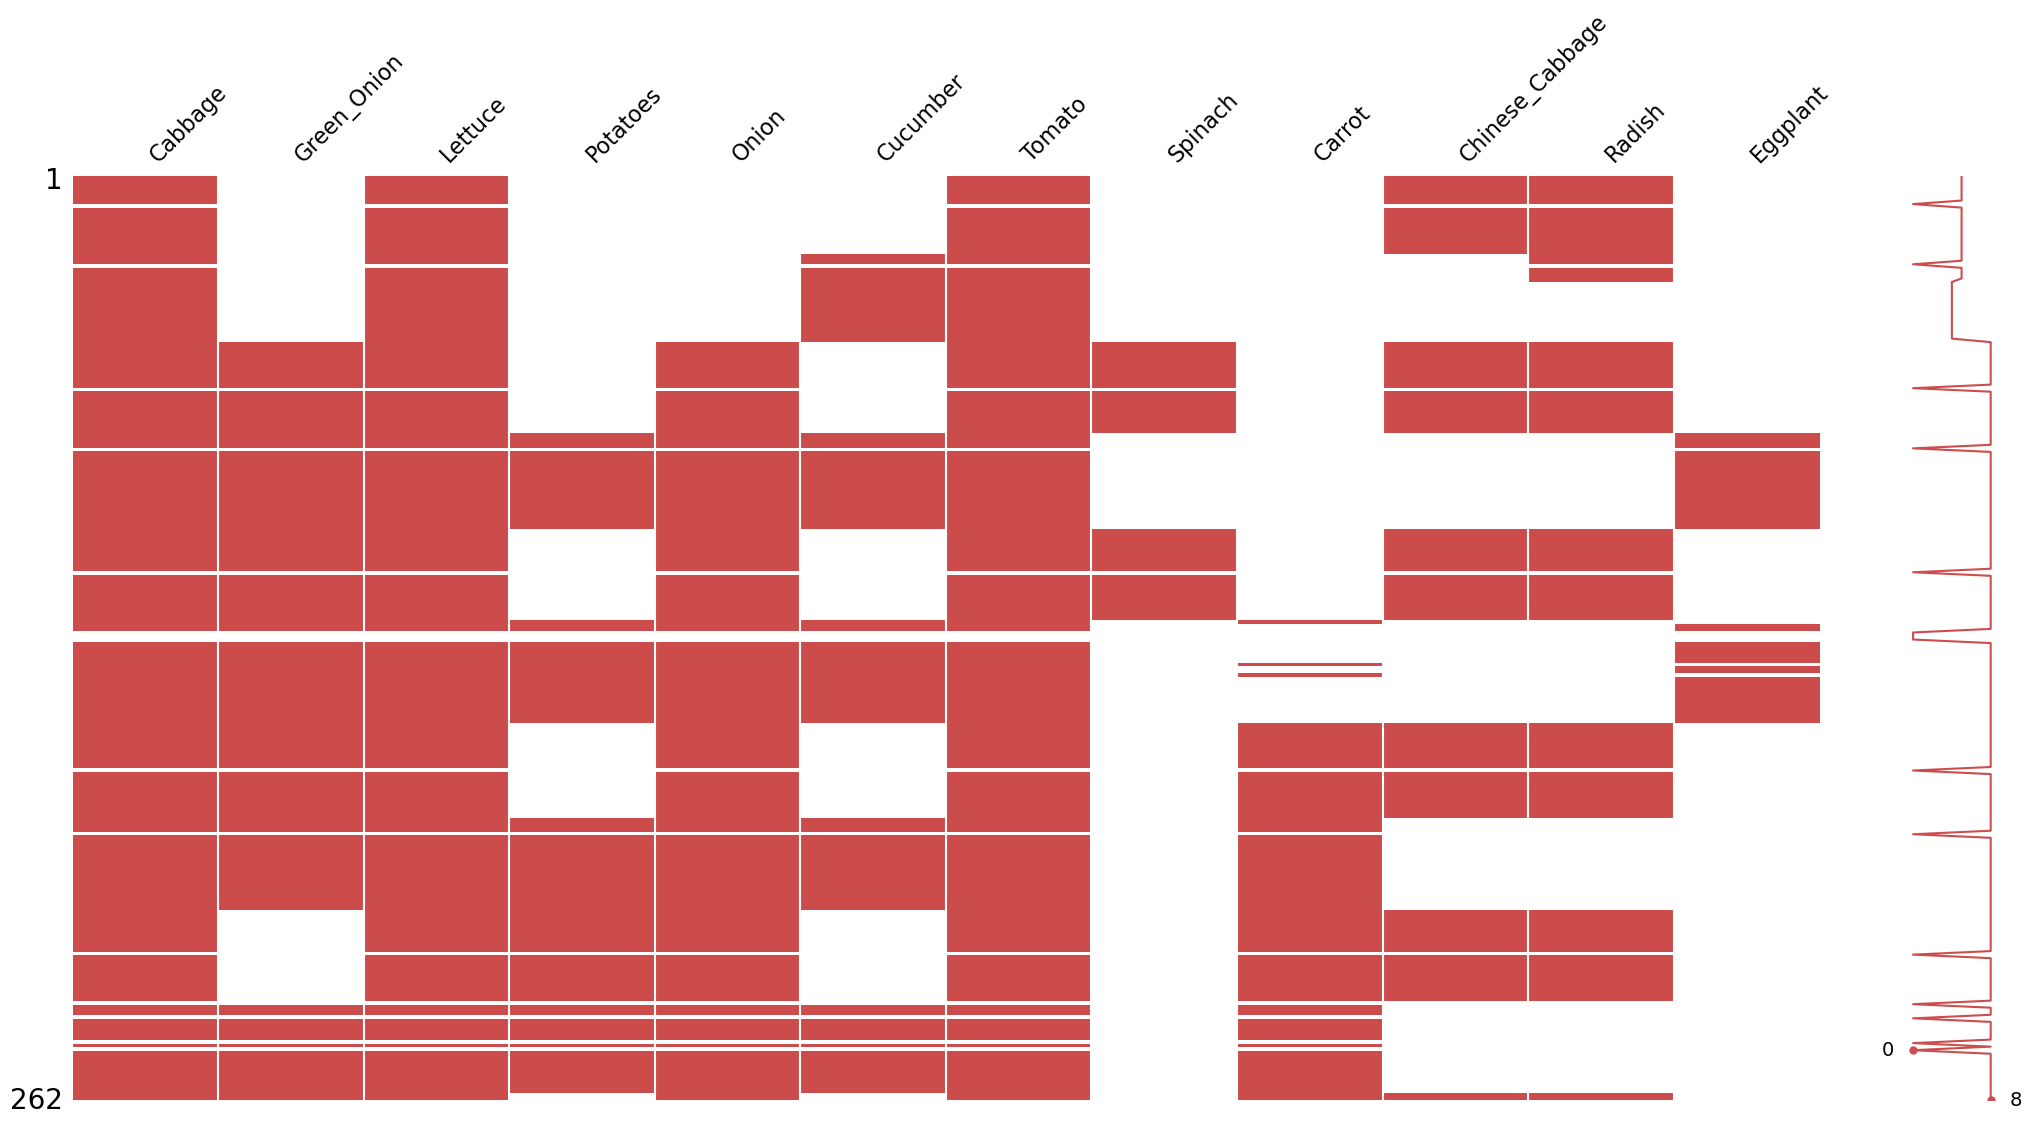

In [19]:
# visualise the pattern of missing values
msno.matrix(df, figsize=(25,12), color=(0.8, 0.3, 0.3))

<AxesSubplot:>

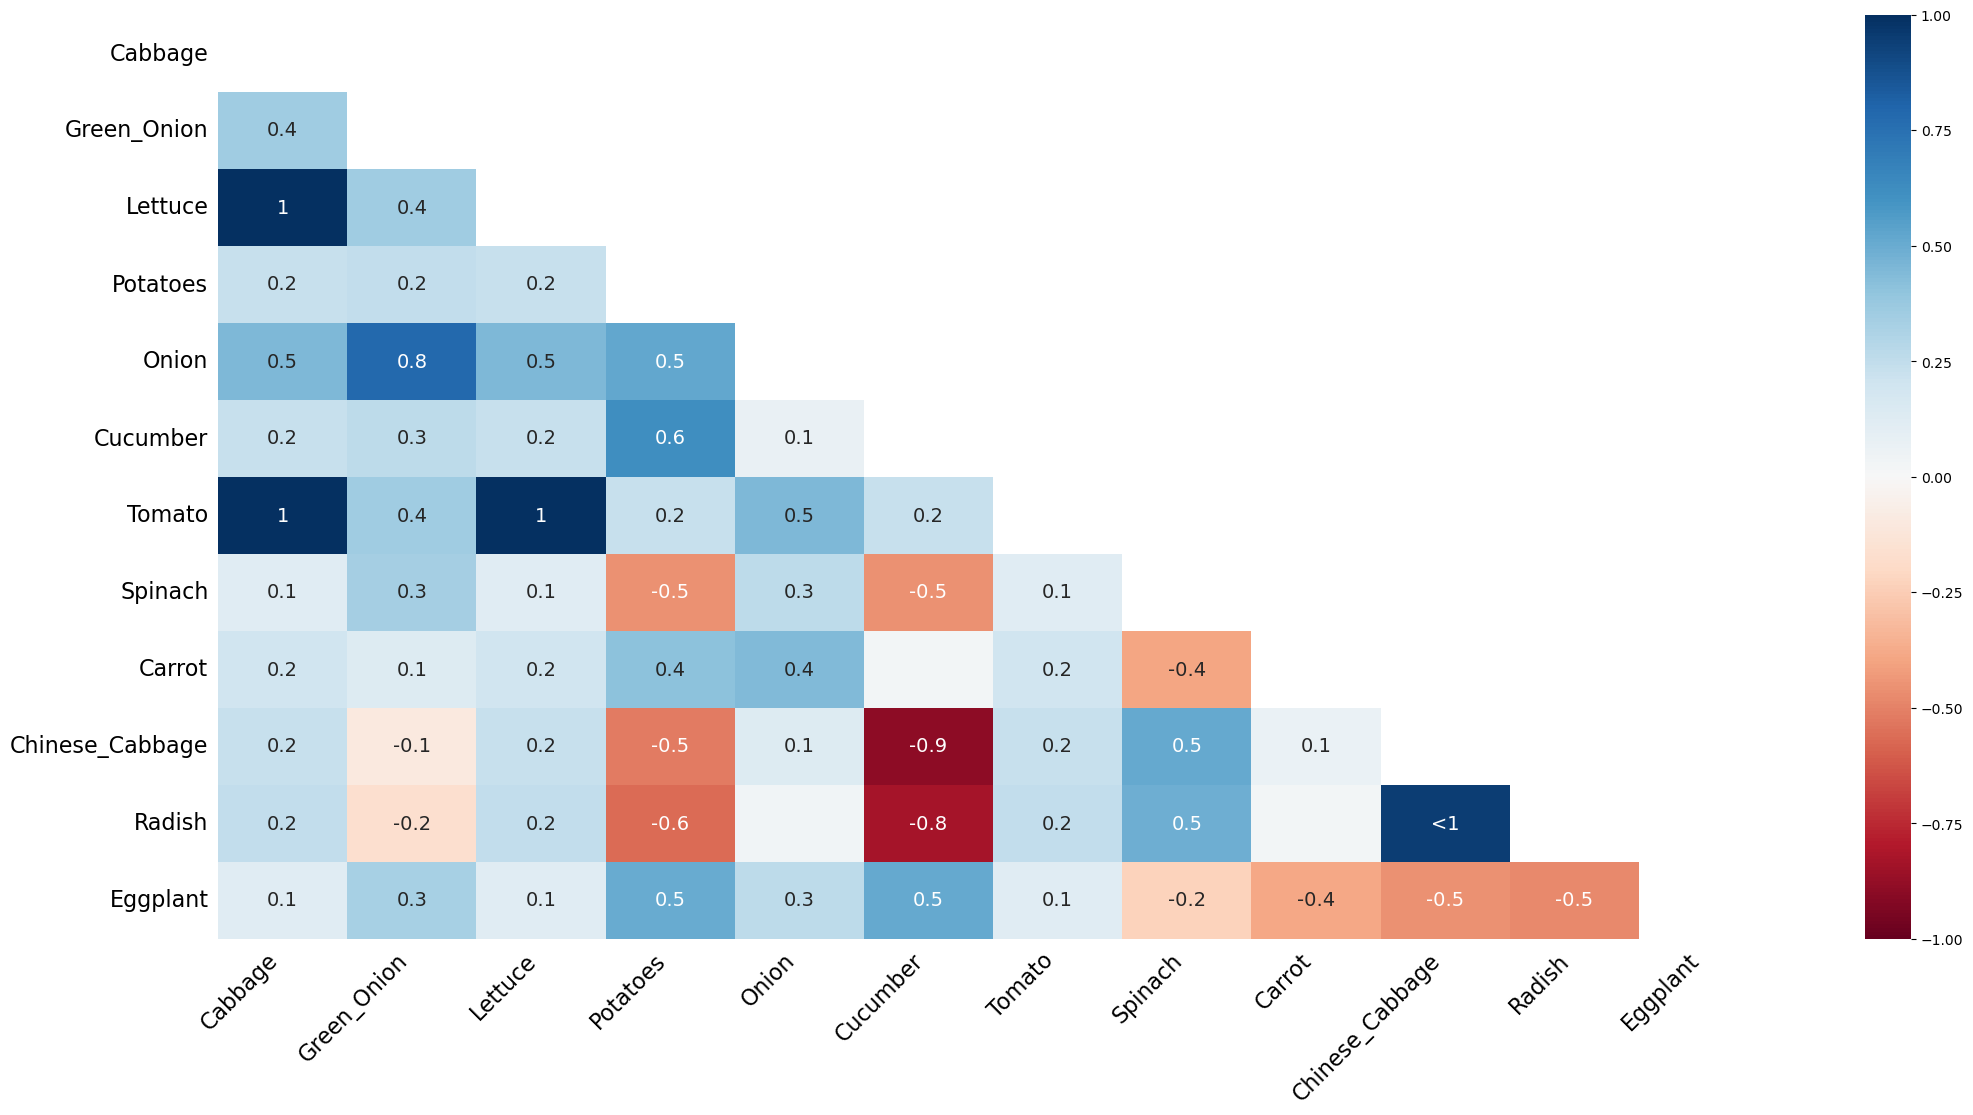

In [20]:
# visualise the correlation between the variables in terms of occurance of missing value
msno.heatmap(df, figsize=(25,12))

- The broken points within the curve indicate missing values in our data. We can observe some seasonilities in some variables like `Cucumber`,`Chinese Cabbage`, and `Raddish`.
- `Chinese cabbage`, and `Radish` have missing data during opposite intervals compared to `Cucumber`.
- `green onion` and `onion` had missing data during the initial times.

There are several methods for imputing missing values in time series data. Which method is most appropriate will depend on the characteristics of your data and the reason for the missing values. Here are a few common techniques:

- Interpolation: This method involves estimating the missing values using the known values surrounding the missing value. Linear interpolation is a simple form of this method, where the missing value is estimated to be the weighted average of the values on either side. More sophisticated interpolation methods, such as spline interpolation, can be used to better capture the underlying trend in the data.

- Last Observation Carried Forward (LOCF): This method involves replacing the missing value with the last known value. This can be a simple and effective approach if the missing values are not too numerous and the data are not changing too rapidly.

- Next Observation Carried Backward (NOCB): It is a method used in time series analysis for estimating the values of a variable at a given point in time using the most recent observation and the observations that come after it. This method is typically used when the data are not evenly spaced in time, or when there are missing values in the data.

- Mean/Median/Mode Imputation: This method involves replacing the missing value with the mean, median, or mode of the known values. This can be a simple and effective approach if the missing values are not too numerous and the data are not too noisy.

It's important to carefully evaluate the performance of each method and choose the one that best fits the characteristics of your data. In some cases, it may be necessary to try multiple methods and compare the results.

### 1. Mean Imputation

The mean value of Cabbage = 180.48442492138884.


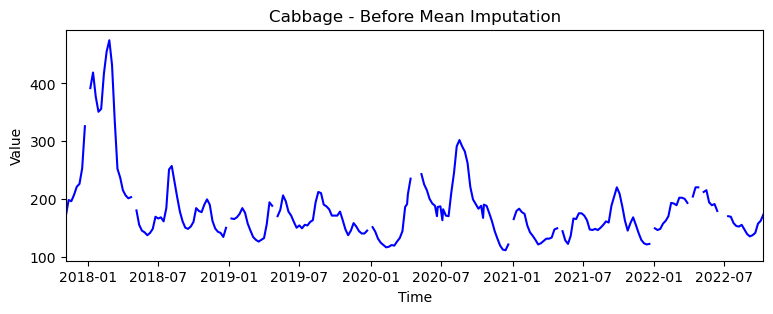

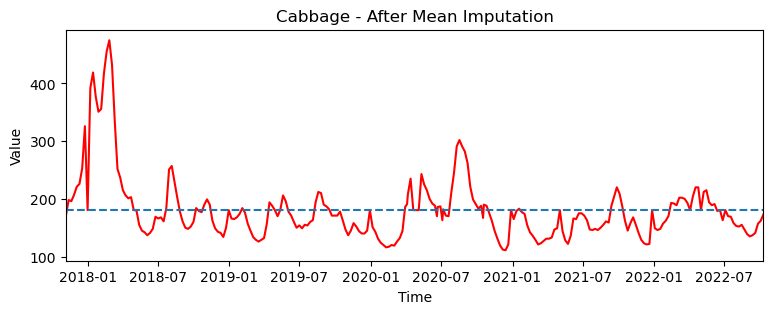

The mean value of Green_Onion = 742.0050929508848.


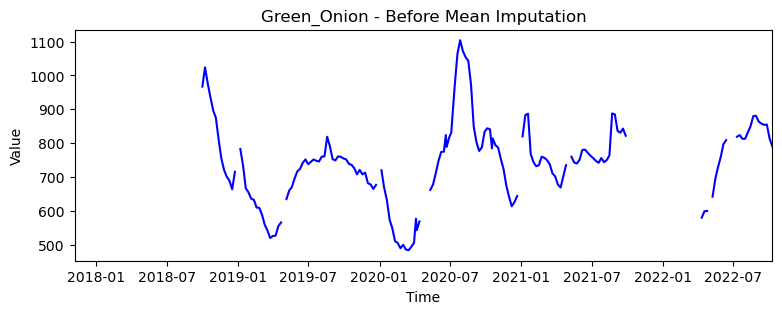

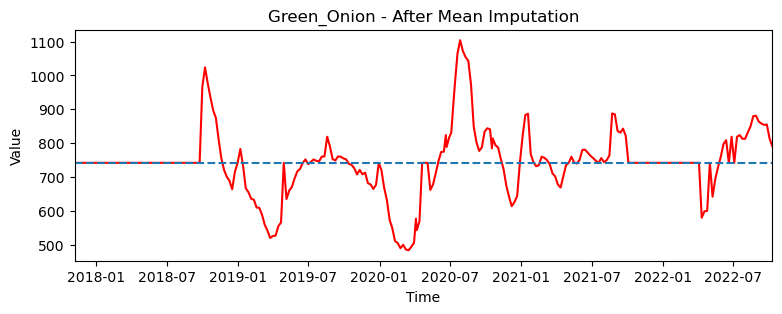

The mean value of Lettuce = 483.27836937951486.


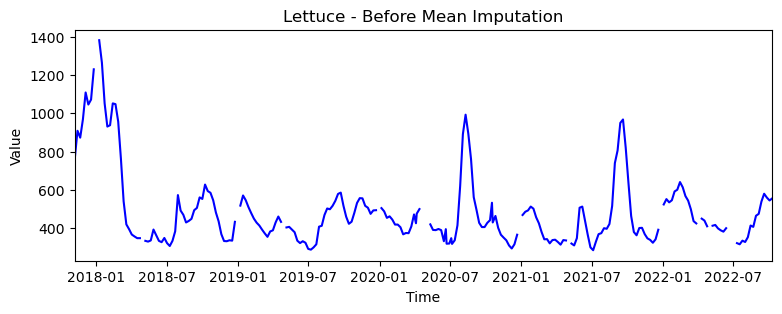

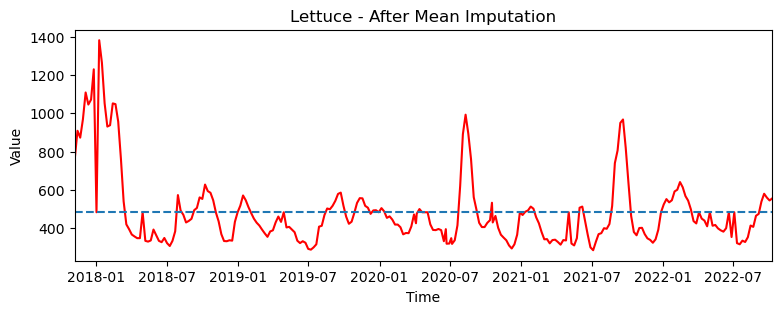

The mean value of Potatoes = 437.63791308949243.


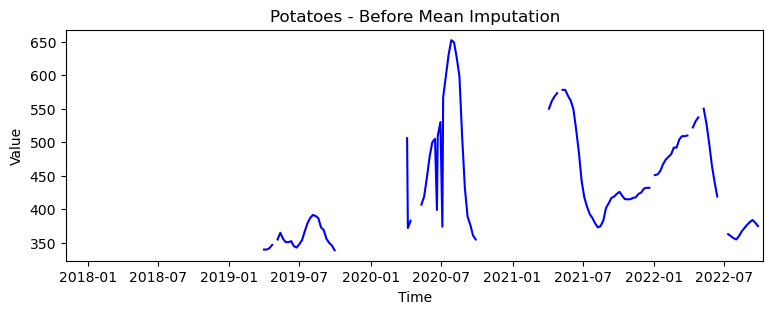

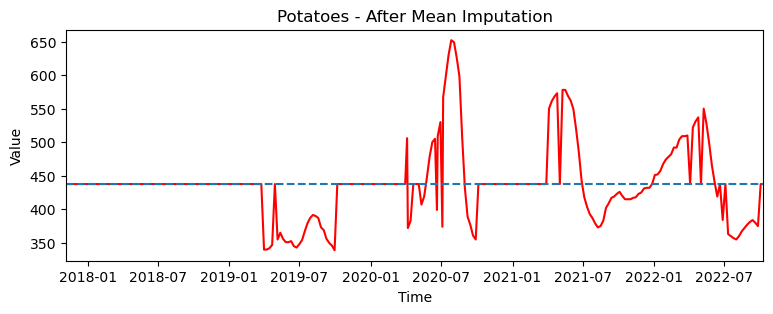

The mean value of Onion = 289.6333809756567.


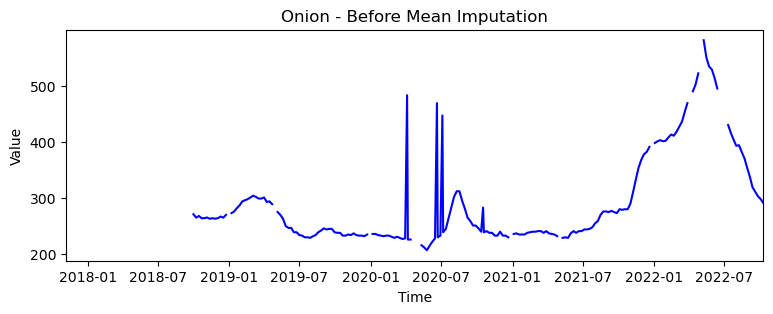

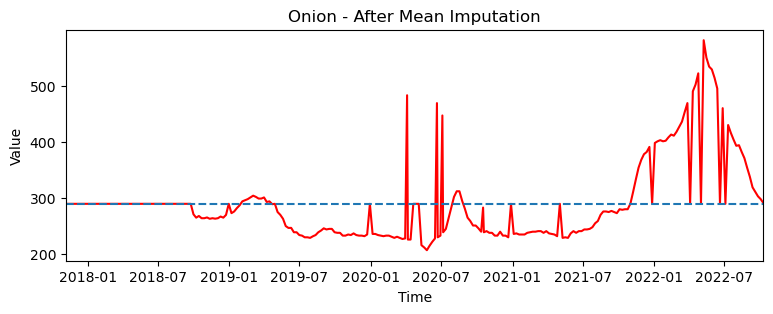

The mean value of Cucumber = 571.5015491857257.


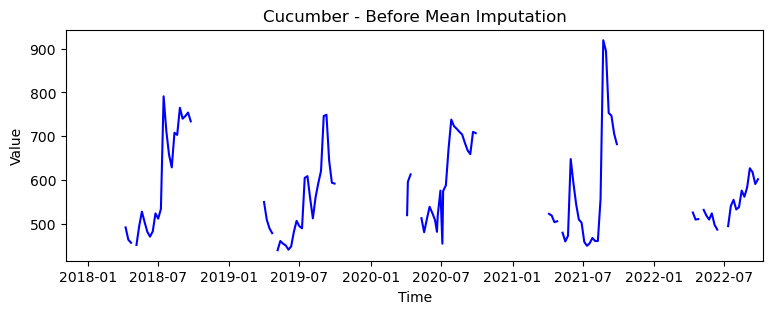

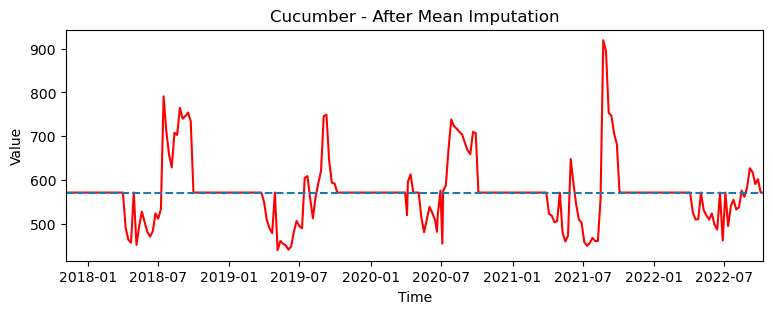

The mean value of Tomato = 715.7715949127613.


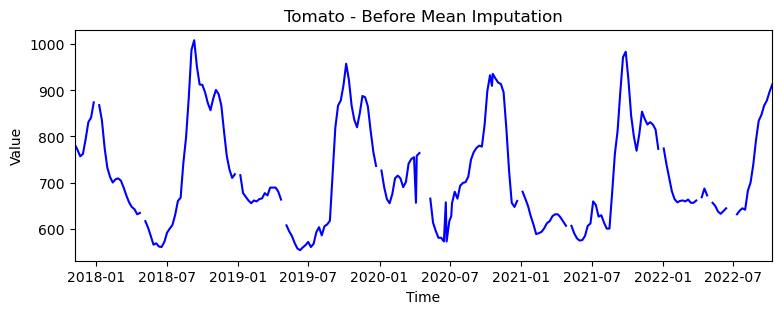

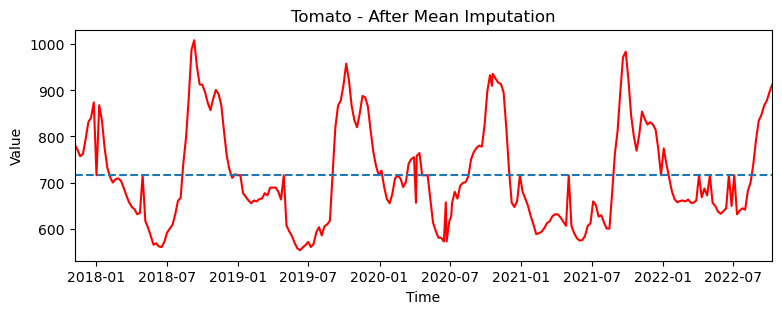

The mean value of Spinach = 930.2628039483441.


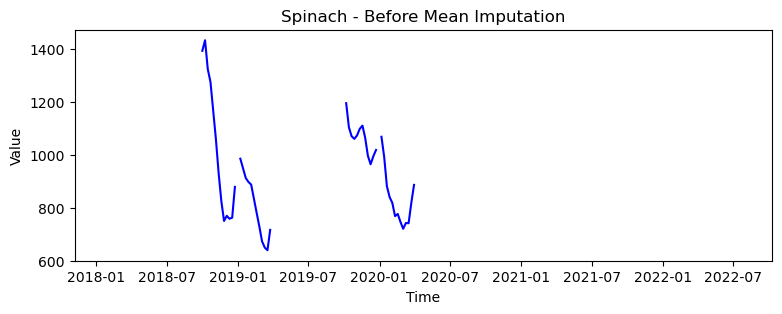

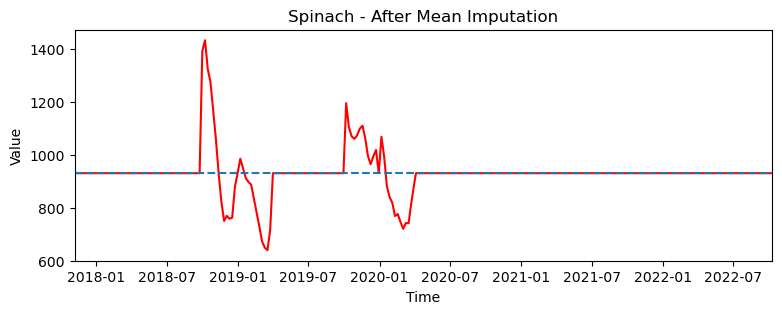

The mean value of Carrot = 387.77669902912623.


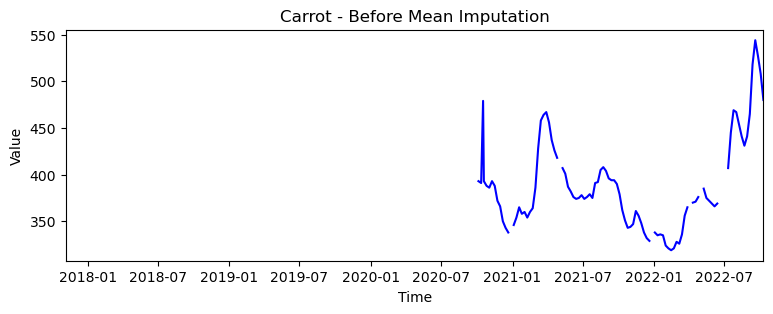

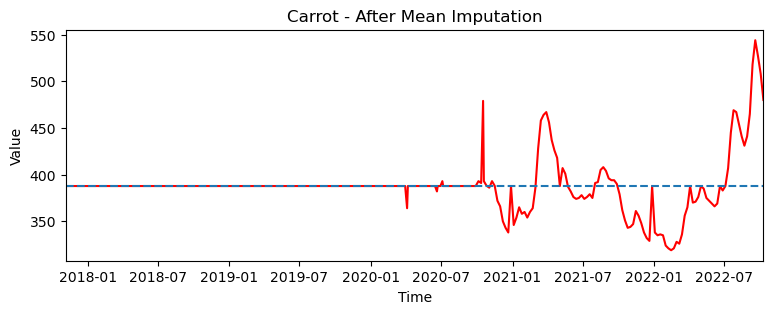

The mean value of Chinese_Cabbage = 190.34975855051445.


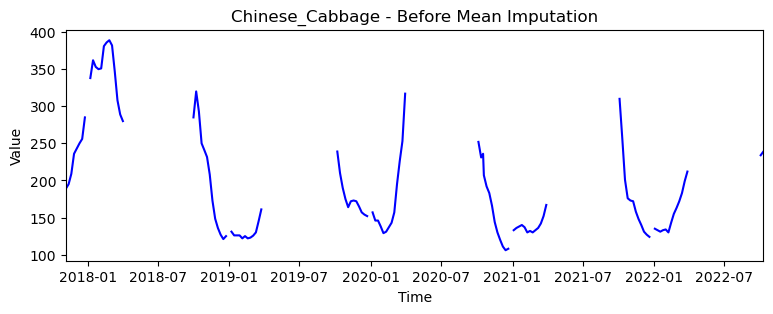

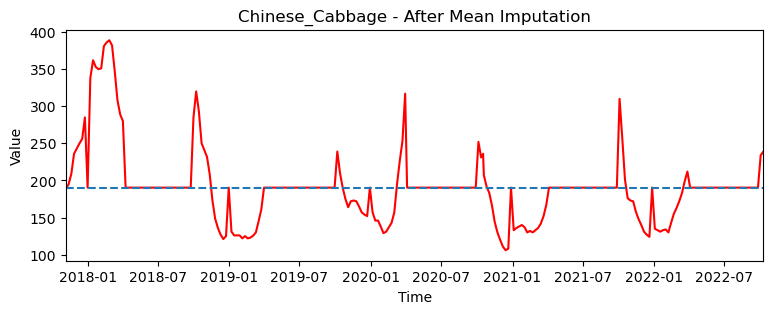

The mean value of Radish = 173.1374941910921.


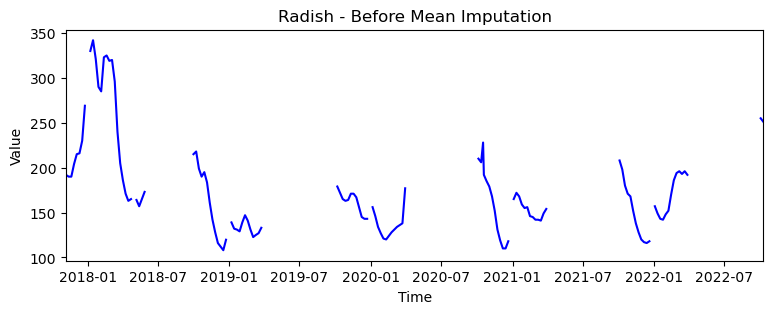

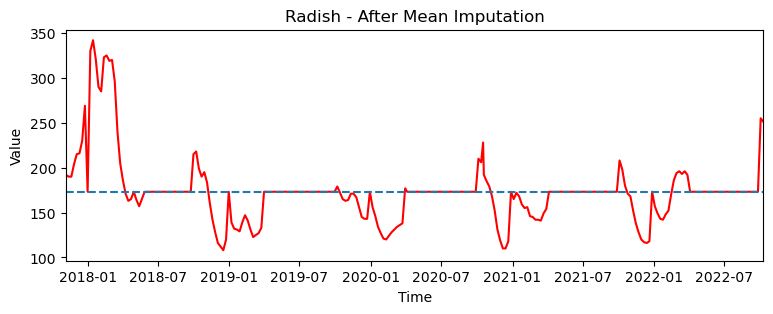

The mean value of Eggplant = 660.5184217878095.


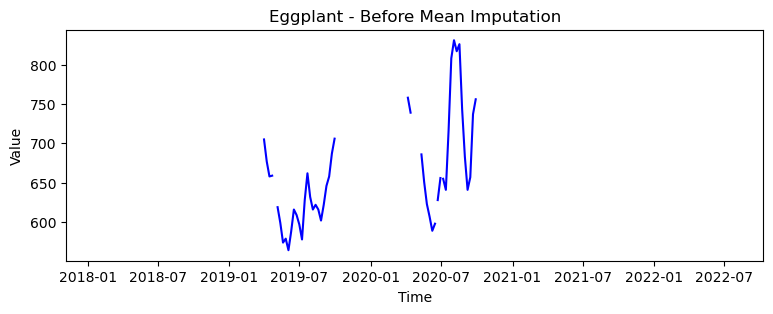

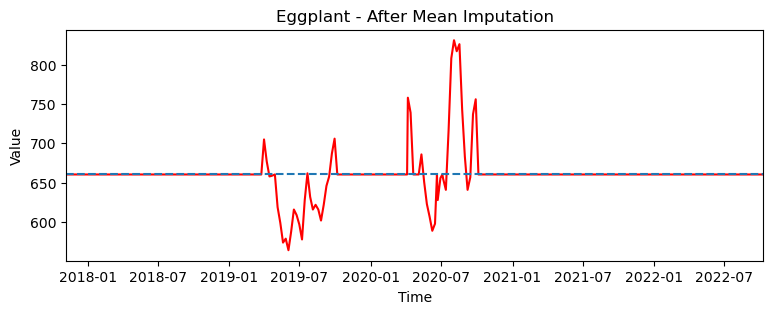

In [21]:
# For Mean Imputation, I create a copy of original dataframe
df1 = df.copy()

for column in df1.columns:
    print('The mean value of {} = {}.'.format(column,df1[column].mean()))
    # set the size of our plot
    plt.rcParams['figure.figsize']=(9,3)
    
    # Determine the start and end dates of the time period that includes the missing values in a time series plot
    start_date = df1.index.min()
    end_date = df1.index.max()

    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    
    # plots our series
    plt.plot(df1[column], color='blue')
    
    # adds title to our time series plot
    plt.title(column + ' - Before Mean Imputation') 
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # print the plot
    plt.show()
    
    
    
    # Calculate the mean value of each selected column
    impute_values = df1[column].mean()
    # Replace missing values with the calculated mean value
    df1[column] = df1[column].fillna(impute_values)
    
    
    
    # pass the data and declared the colour of your curve, i.e., red
    plt.plot(df1[column], color='red')
    # add tittle to the plot
    plt.title(column + ' - After Mean Imputation')
    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    # adds title to our time series plot
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.axhline(y=df1[column].mean(),ls=('--'))
    # print the plot
    plt.show()

### 2. Median Imputation

The median value of Cabbage = 168.0.


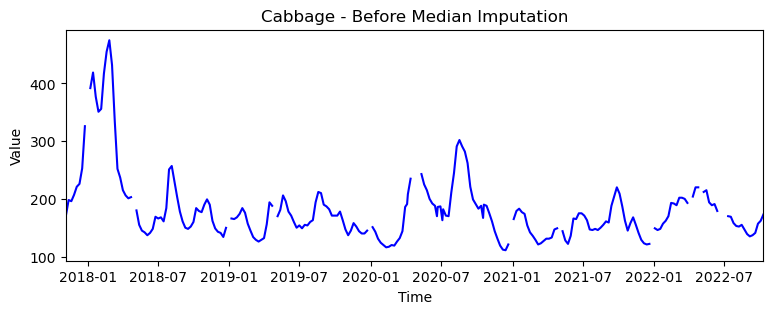

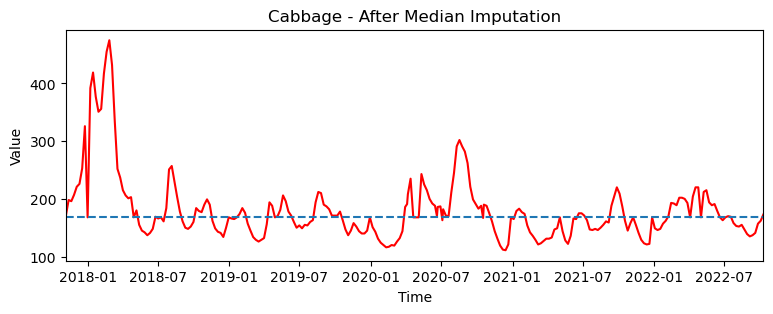

The median value of Green_Onion = 748.0.


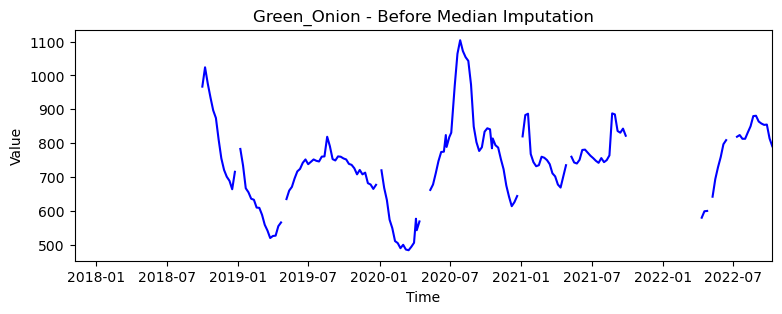

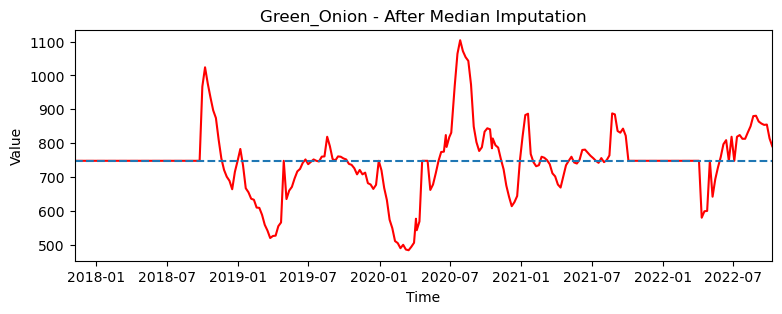

The median value of Lettuce = 426.0.


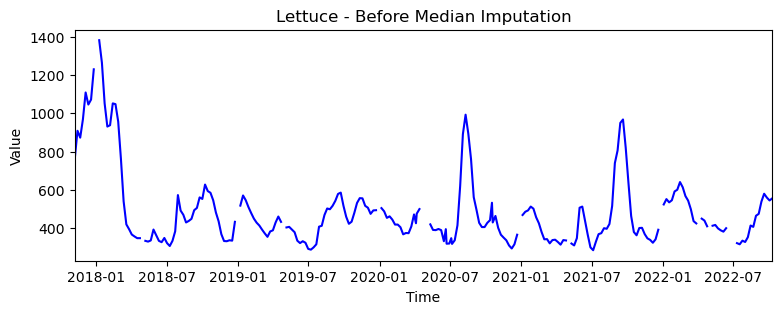

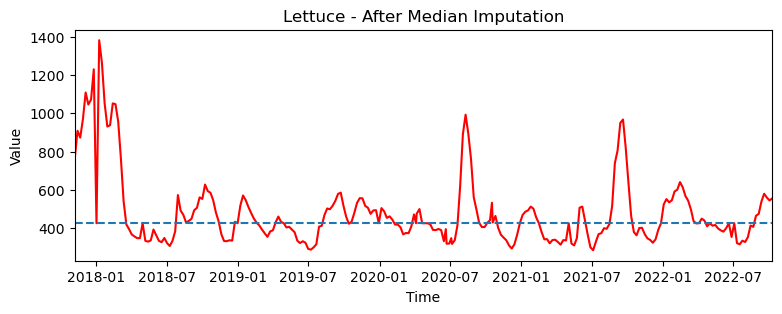

The median value of Potatoes = 417.5.


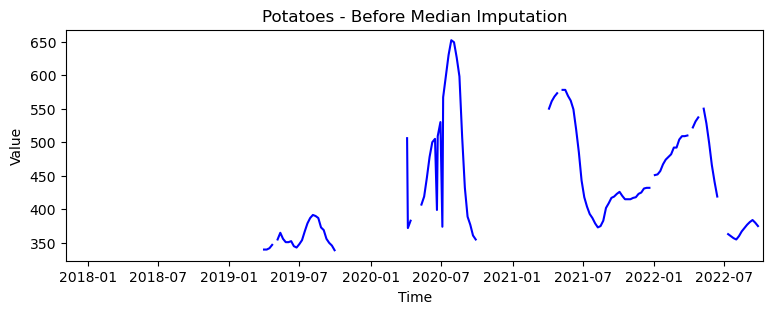

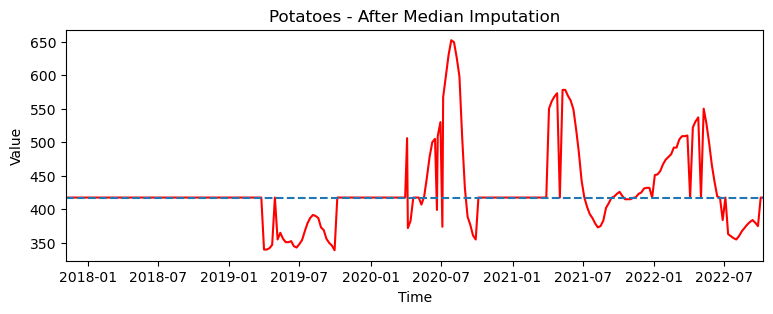

The median value of Onion = 259.0.


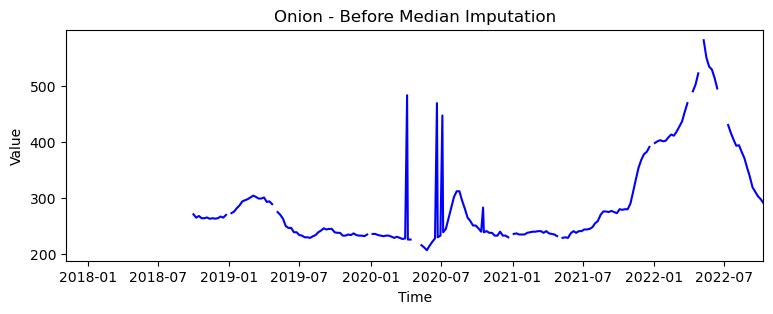

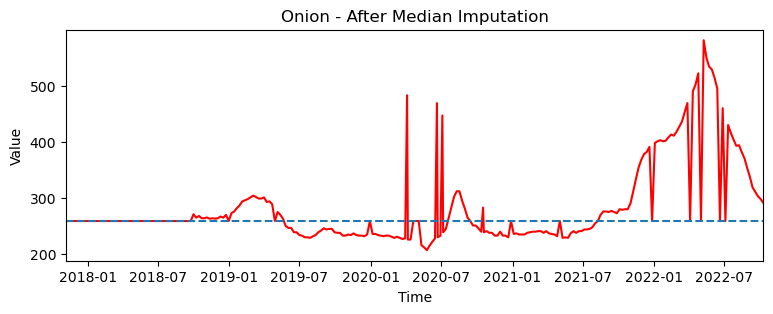

The median value of Cucumber = 533.0.


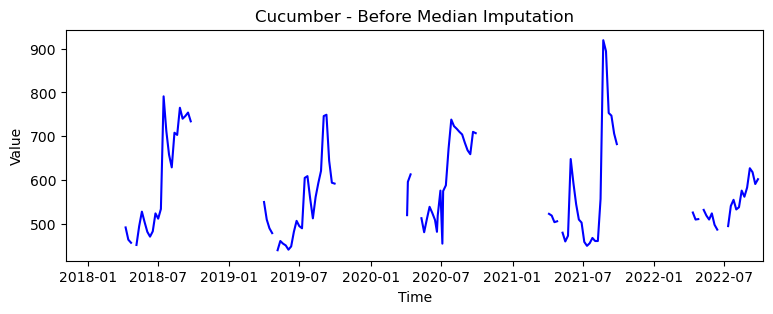

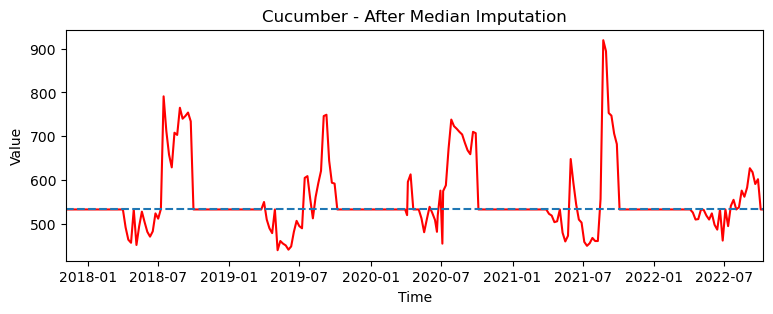

The median value of Tomato = 680.0.


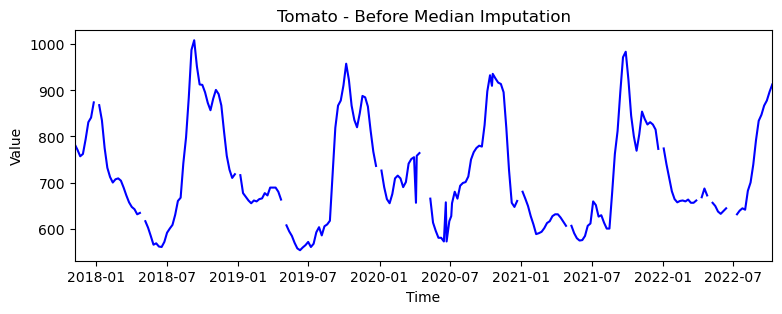

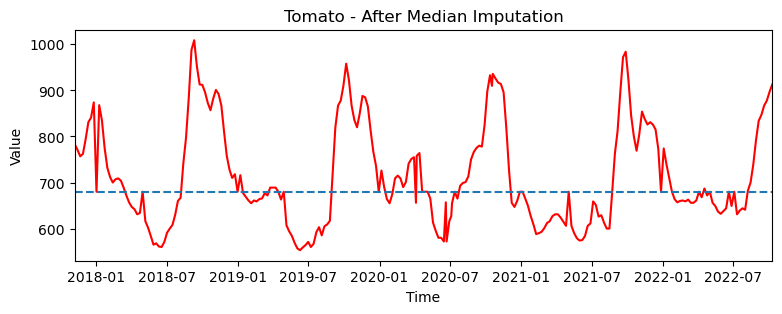

The median value of Spinach = 892.0.


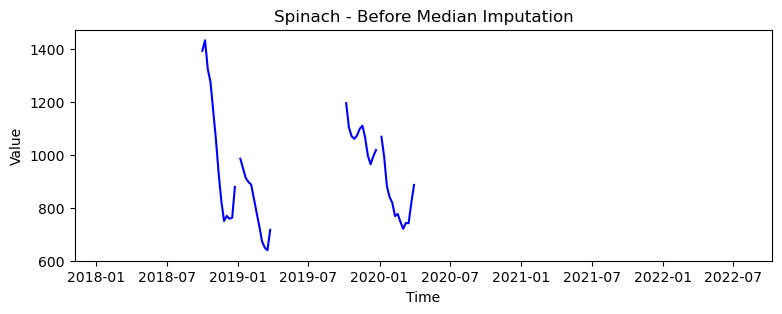

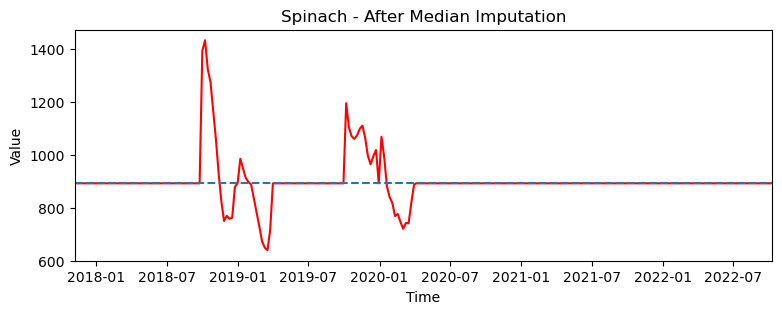

The median value of Carrot = 376.0.


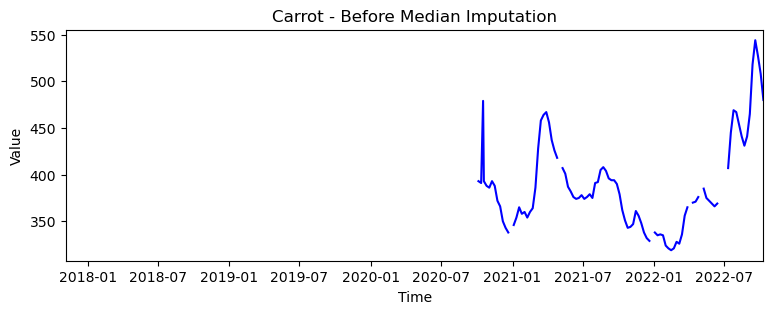

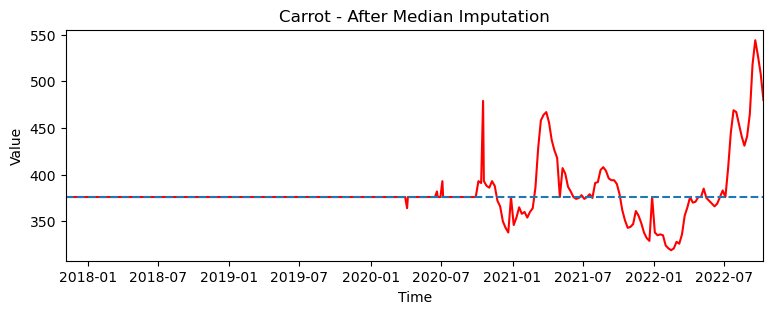

The median value of Chinese_Cabbage = 163.5.


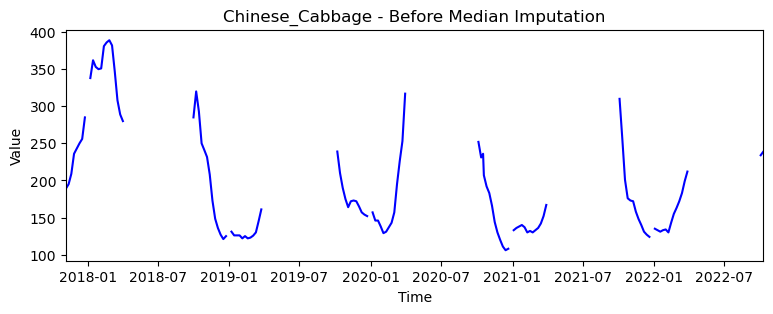

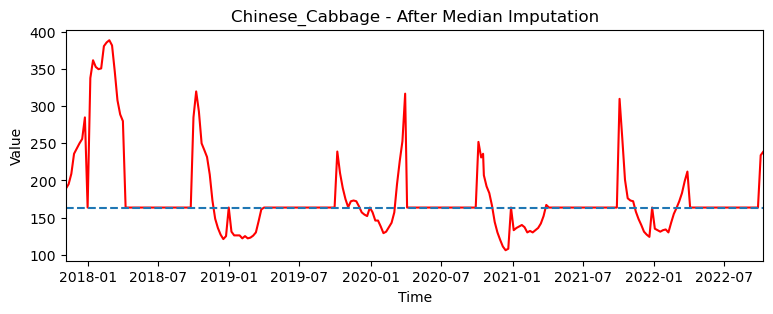

The median value of Radish = 163.0.


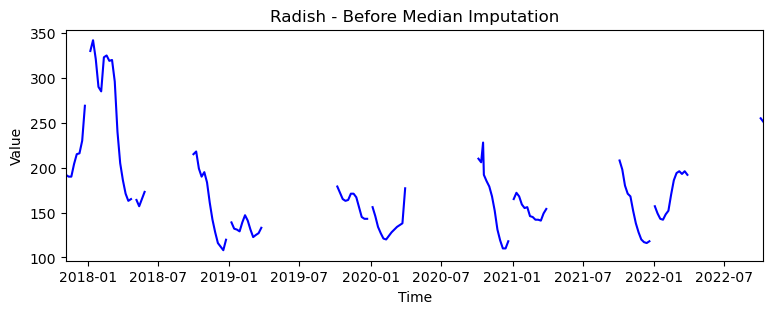

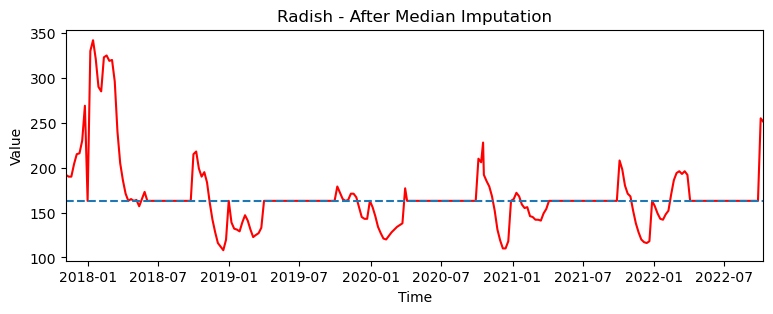

The median value of Eggplant = 646.0.


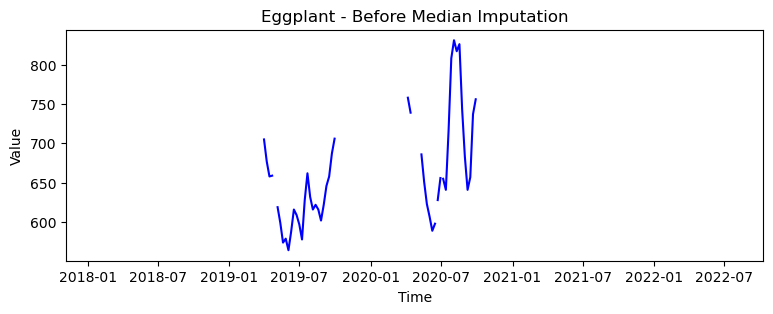

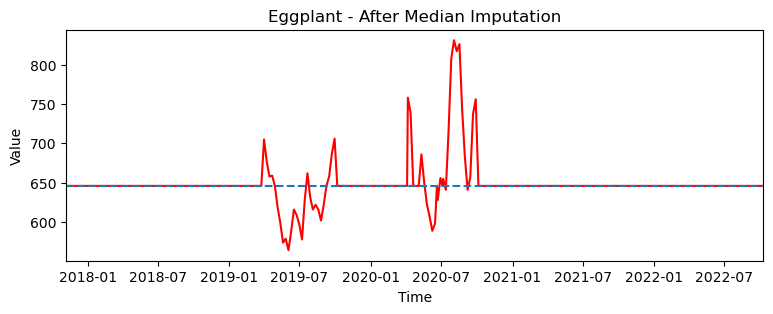

In [22]:
# For Median Imputation, I create a copy of original dataframe
df2 = df.copy()

for column in df2.columns:
    print('The median value of {} = {}.'.format(column,df2[column].median()))
    # set the size of our plot
    plt.rcParams['figure.figsize']=(9,3)
    
    # Determine the start and end dates of the time period that includes the missing values in a time series plot
    start_date = df2.index.min()
    end_date = df2.index.max()

    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    
    # plots our series
    plt.plot(df2[column], color='blue')
    
    # adds title to our time series plot
    plt.title(column + ' - Before Median Imputation') 
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # print the plot
    plt.show()
    
    
    
    # Calculate the median value of each selected column
    impute_values = df2[column].median()
    # Replace missing values with the calculated median value
    df2[column] = df2[column].fillna(impute_values)
    
    
    
    # pass the data and declared the colour of your curve, i.e., red
    plt.plot(df2[column], color='red')
    # add tittle to the plot
    plt.title(column + ' - After Median Imputation')
    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    # adds title to our time series plot
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.axhline(y=df2[column].median(),ls=('--'))
    # print the plot
    plt.show()

### 3. Last Observation Carried Forward (LOCF)
- According to this technique, the missing value is imputed using the values before it in the time series.

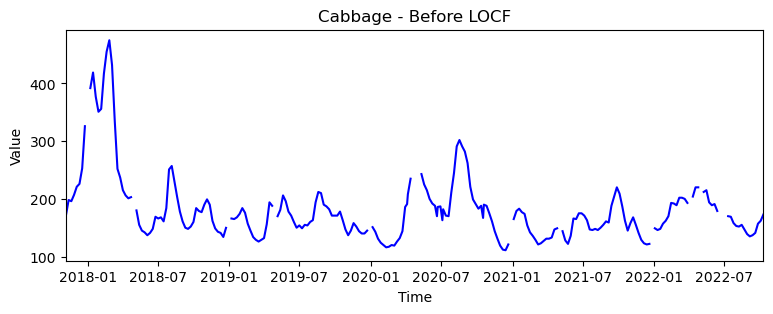

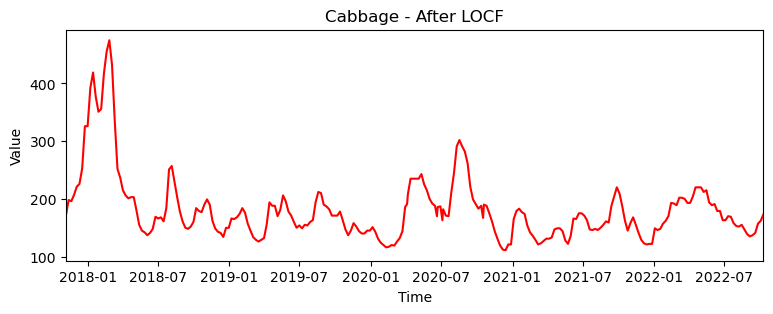

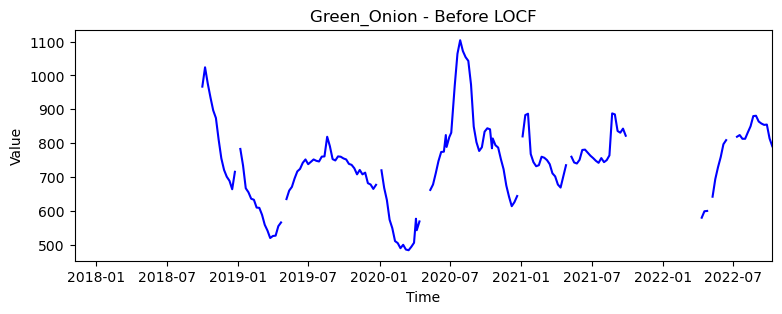

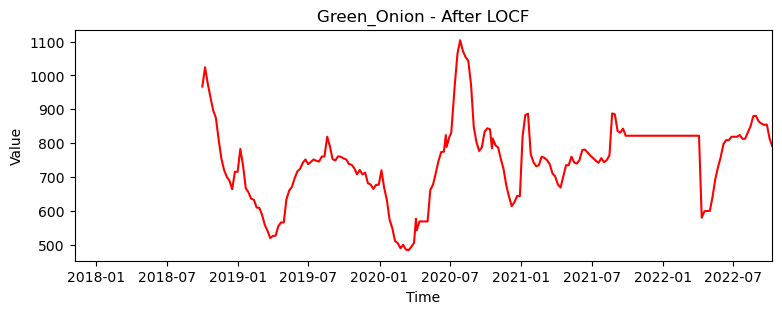

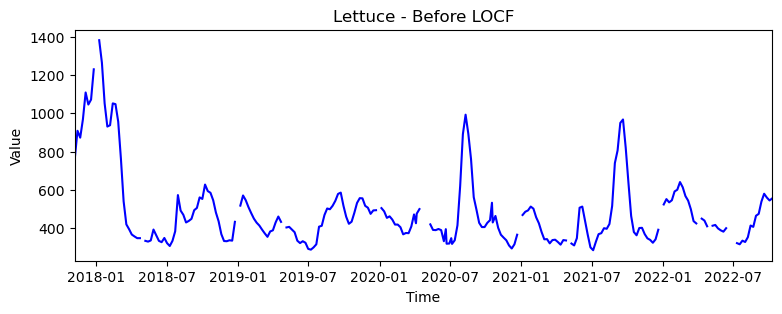

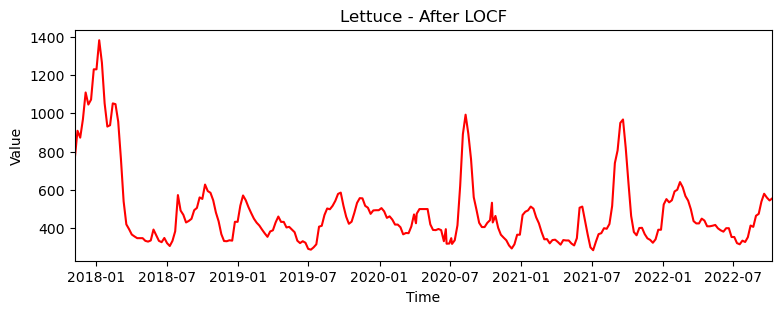

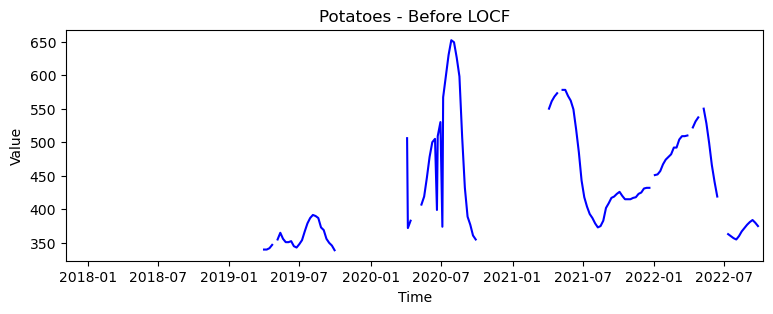

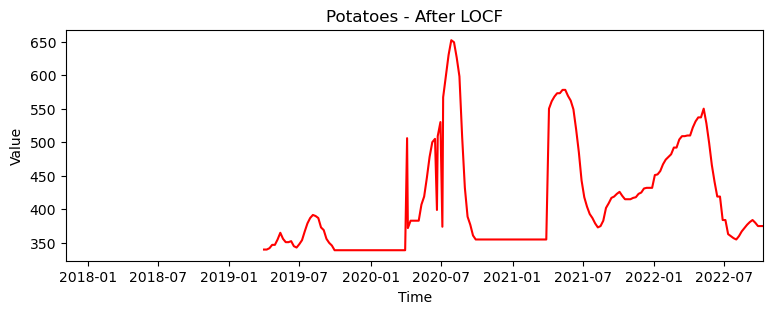

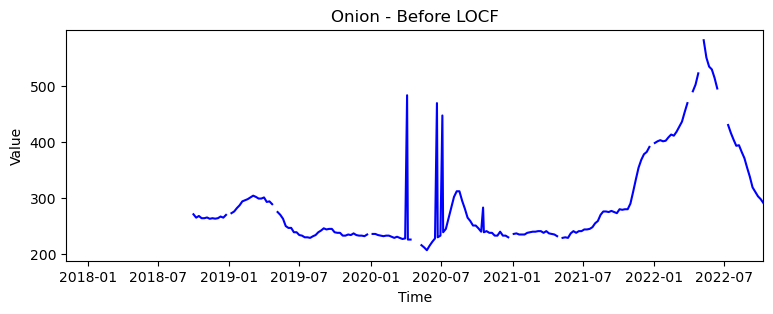

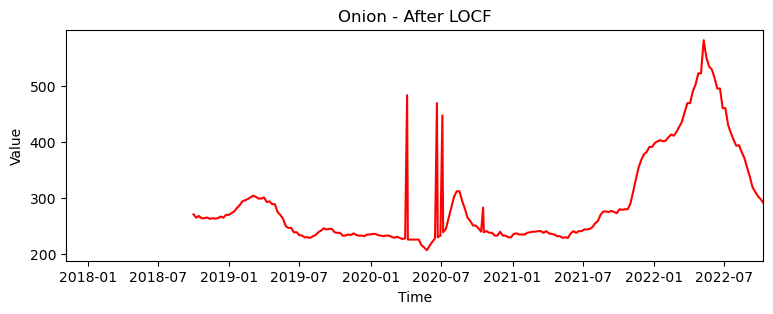

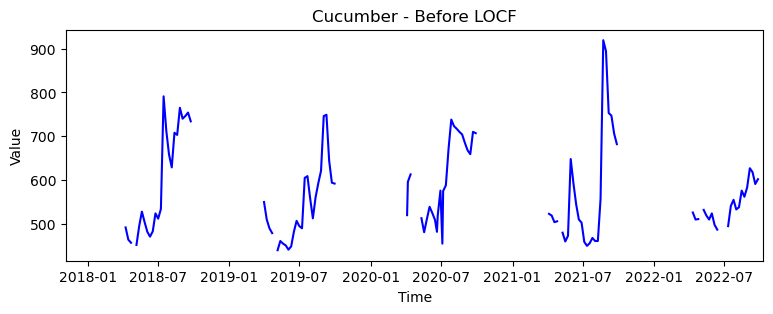

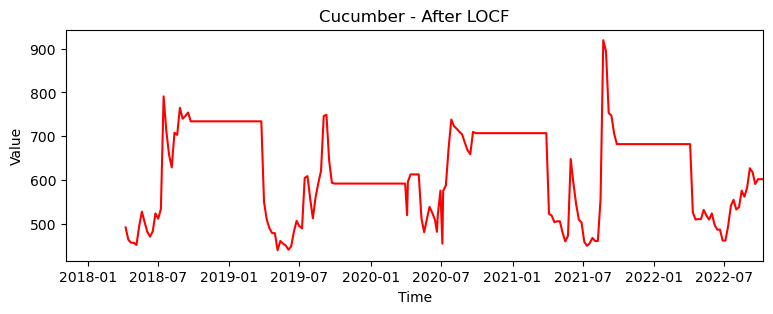

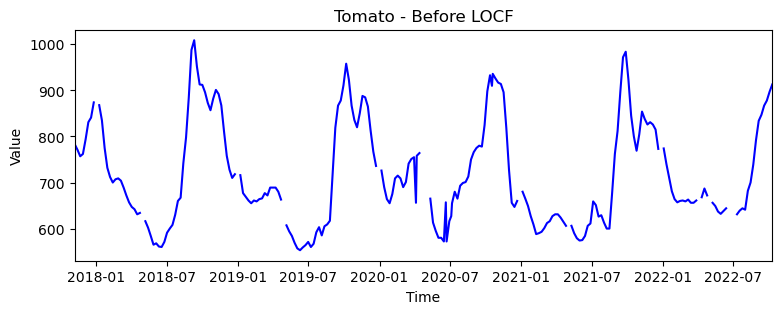

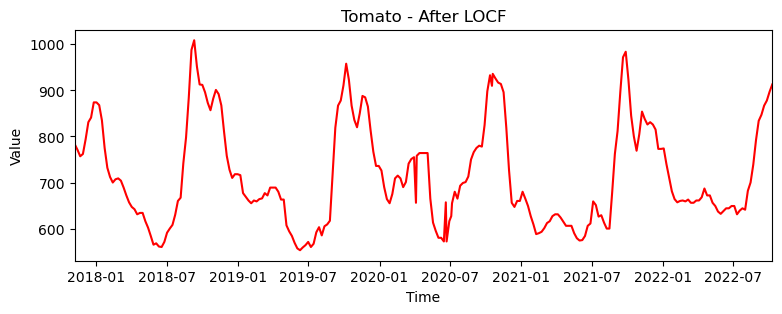

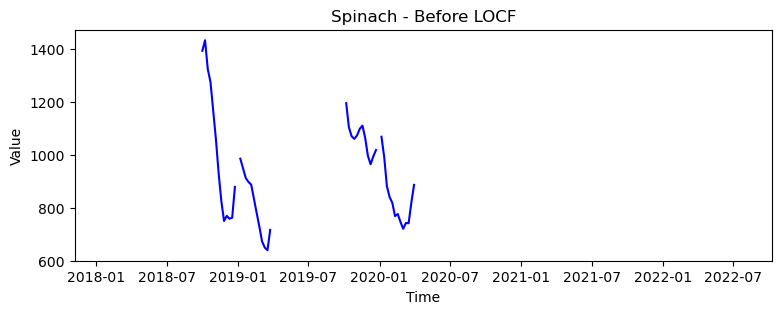

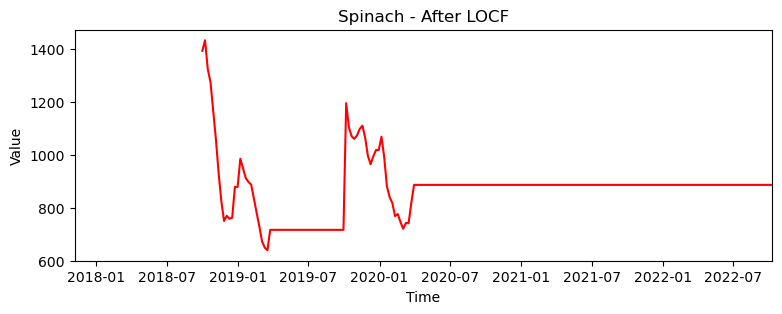

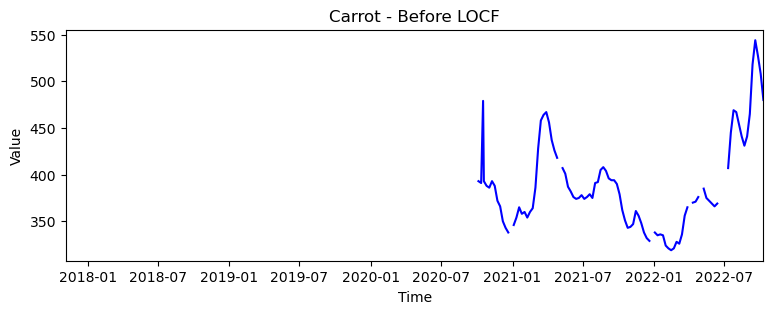

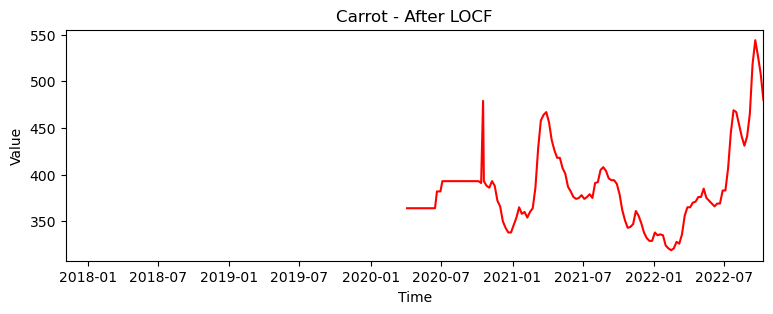

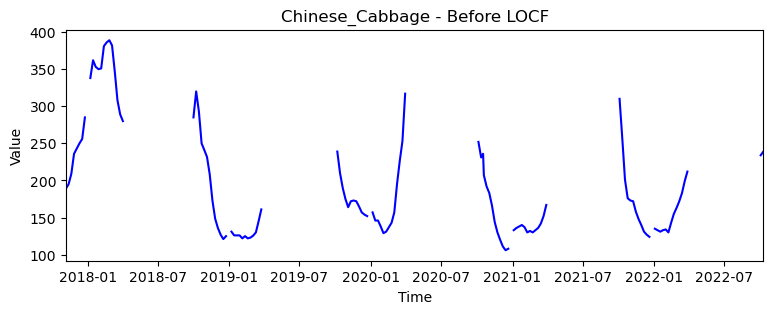

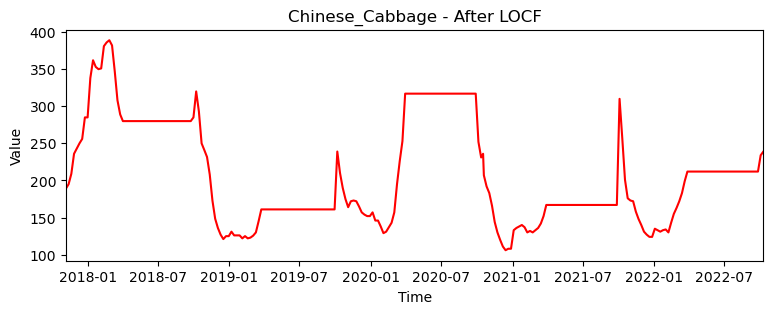

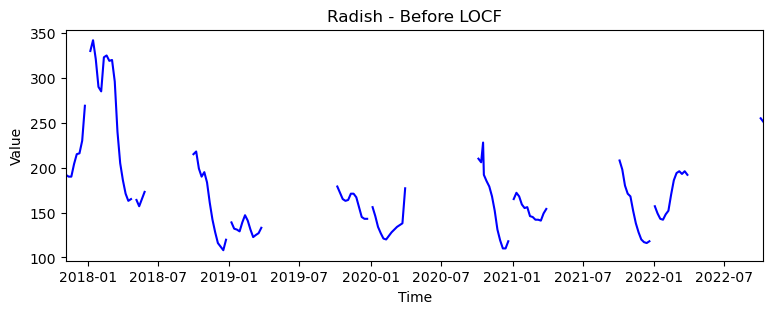

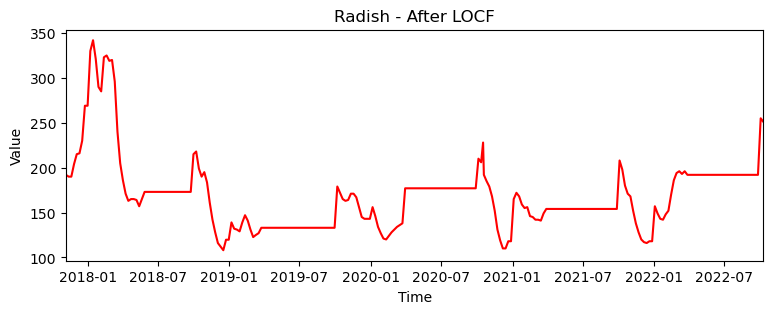

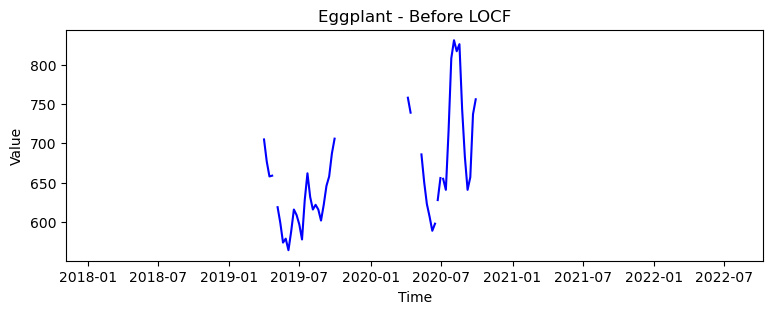

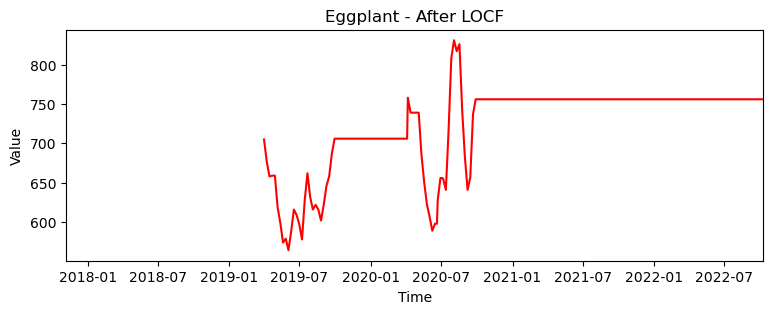

In [23]:
# For LOCF, I create a copy of original dataframe
df3 = df.copy()

for column in df3.columns:
    # set the size of our plot
    plt.rcParams['figure.figsize']=(9,3)
    
    # Determine the start and end dates of the time period that includes the missing values in a time series plot
    start_date = df3.index.min()
    end_date = df3.index.max()

    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    
    # plots our series
    plt.plot(df3[column], color='blue')
    
    # adds title to our time series plot
    plt.title(column + ' - Before LOCF') 
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # print the plot
    plt.show()
    
    
    
    # LOCF
    df3[column] = df3[column].fillna(method ='ffill')
    
    
    
    # pass the data and declared the colour of your curve, i.e., red
    plt.plot(df3[column], color='red')
    # add tittle to the plot
    plt.title(column + ' - After LOCF')
    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    # adds title to our time series plot
    plt.xlabel('Time')
    plt.ylabel('Value')
    # print the plot
    plt.show()

### 4. Next Observation Carried Backward (NOCB)
- According to this technique, the missing values are imputed using an immediate value ahead of them.

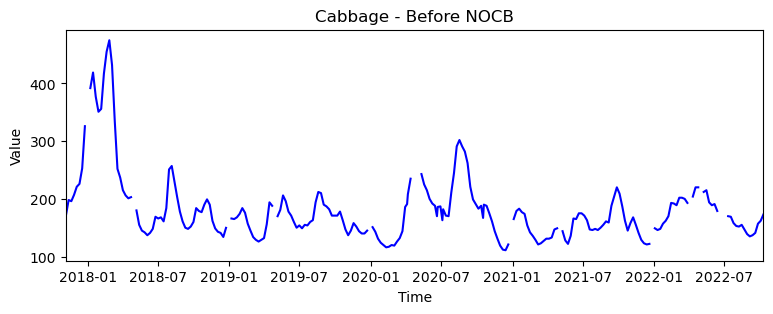

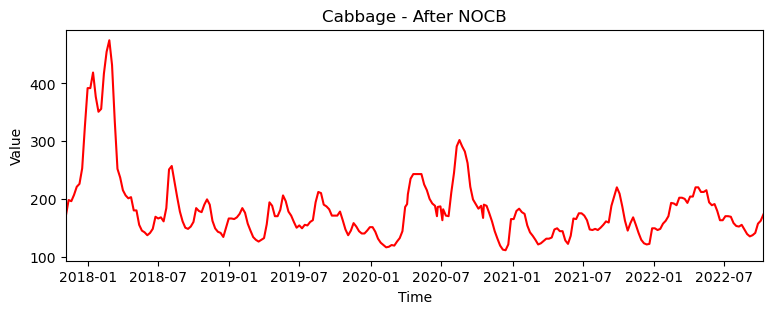

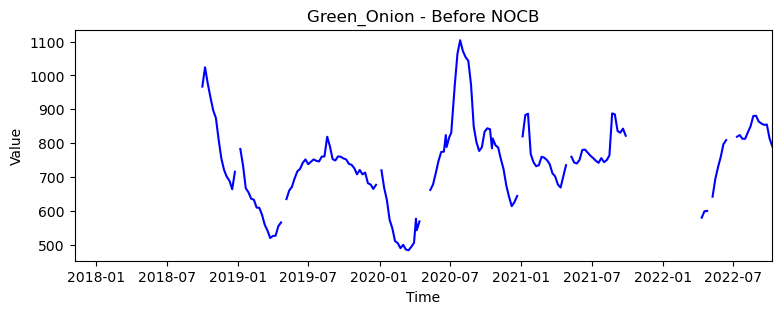

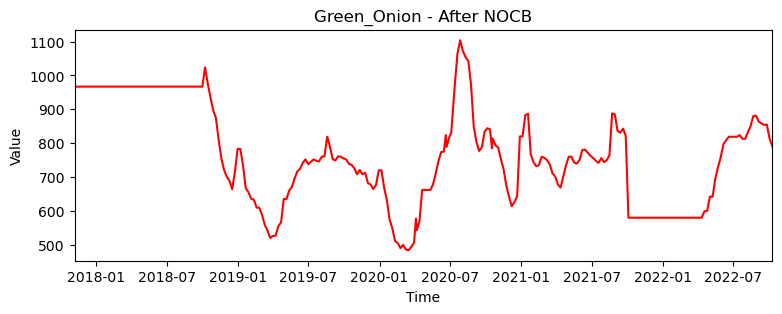

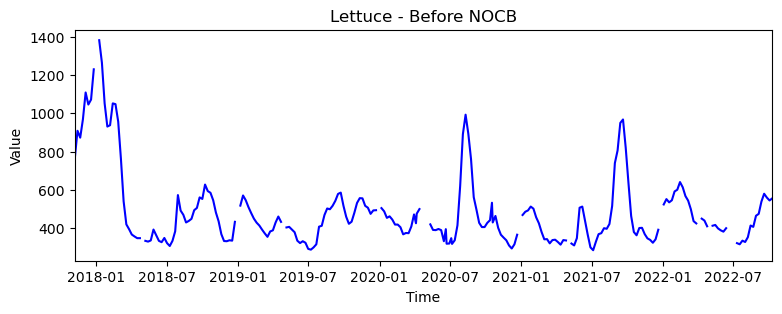

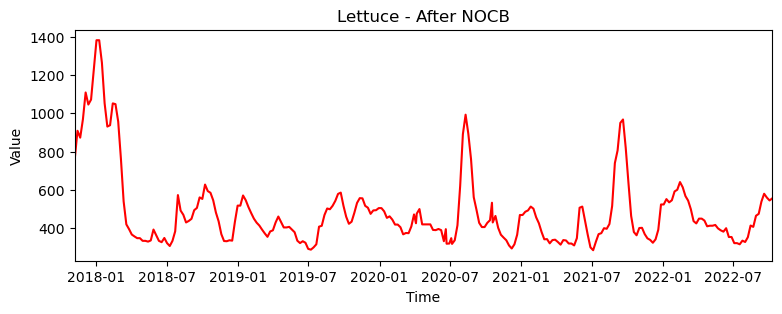

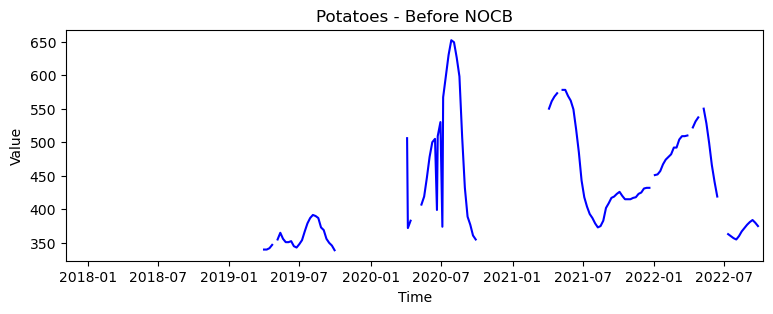

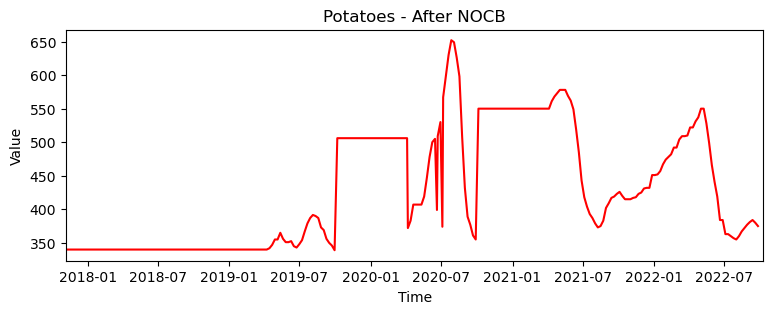

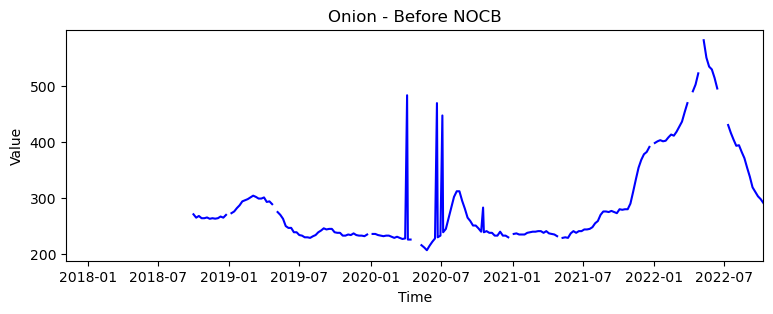

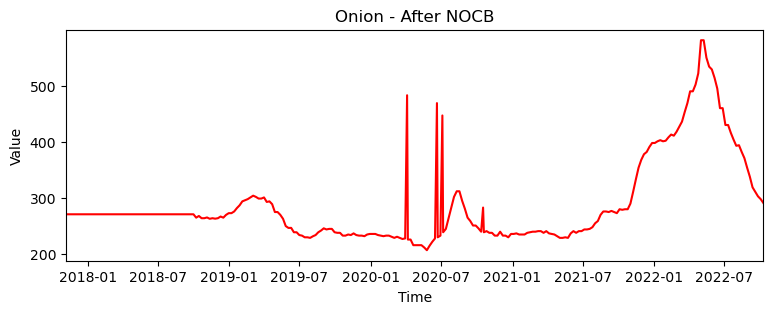

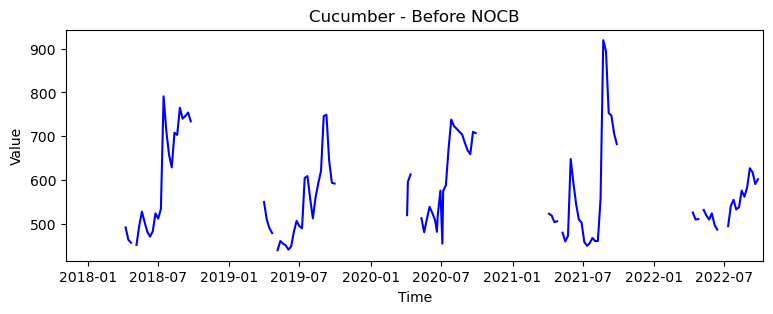

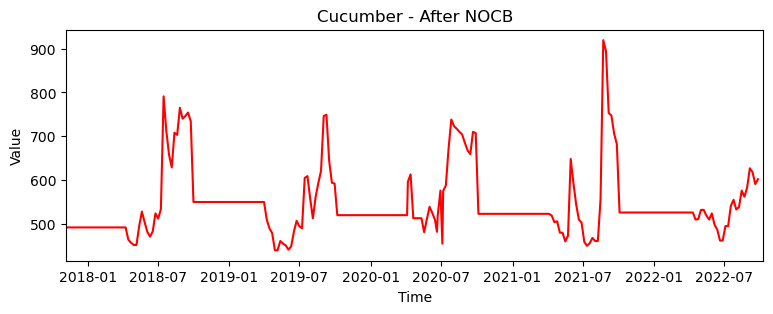

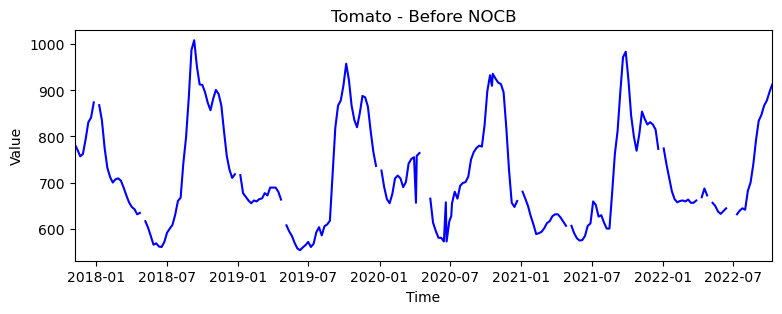

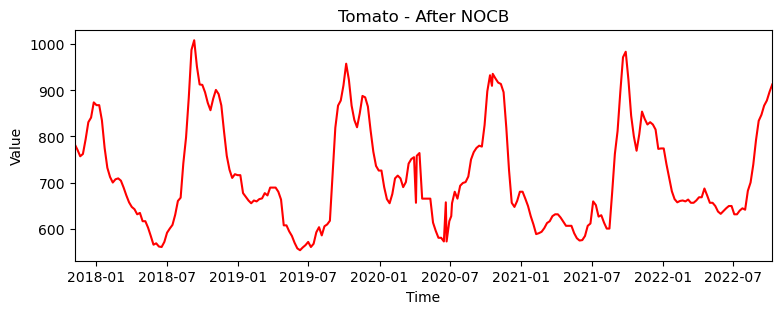

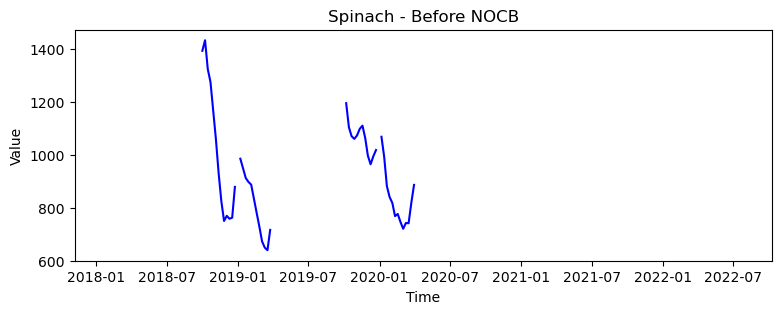

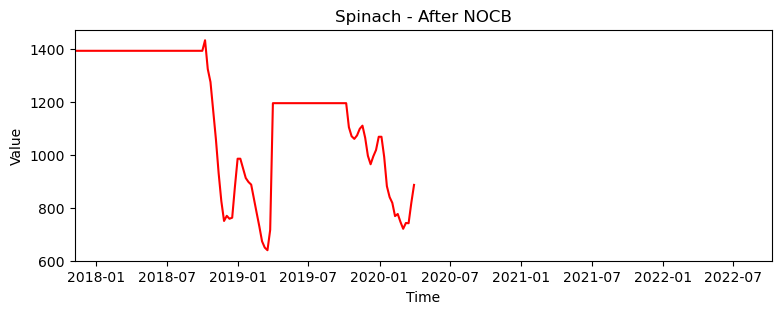

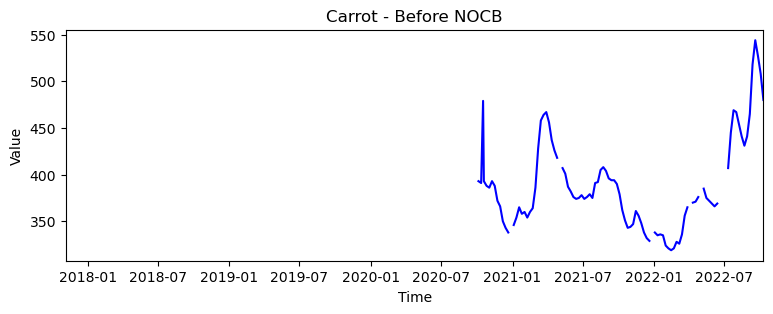

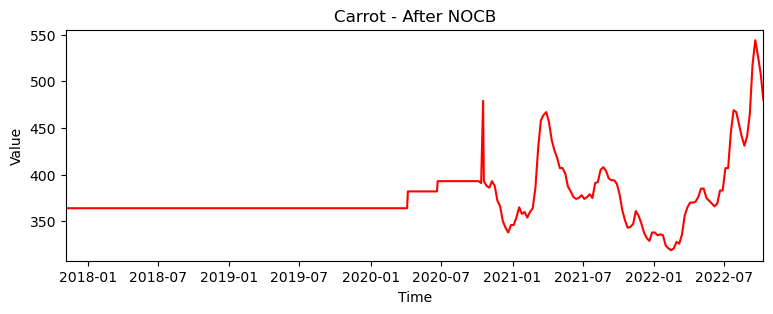

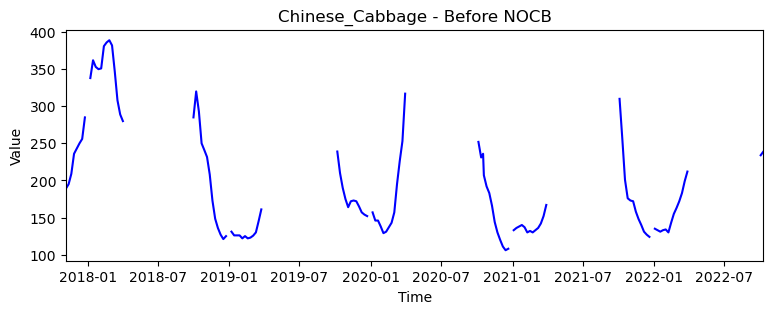

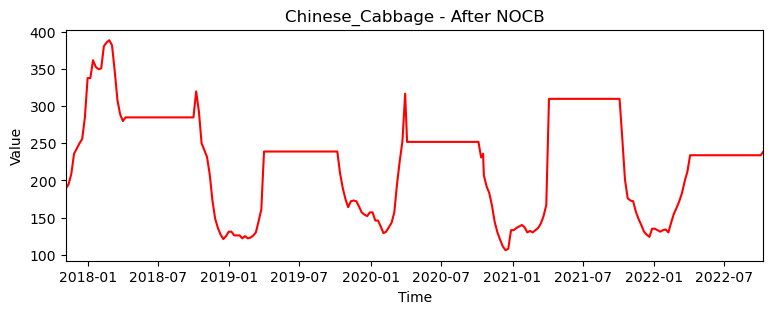

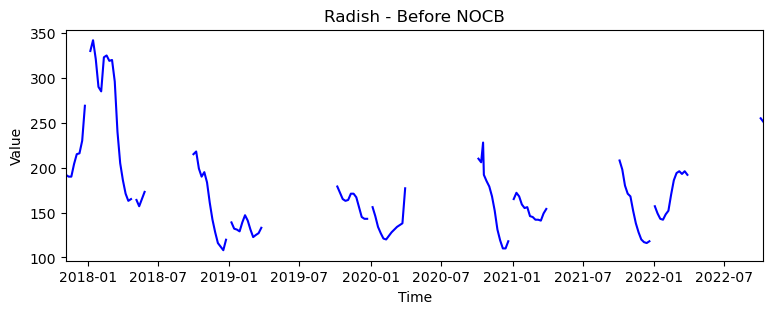

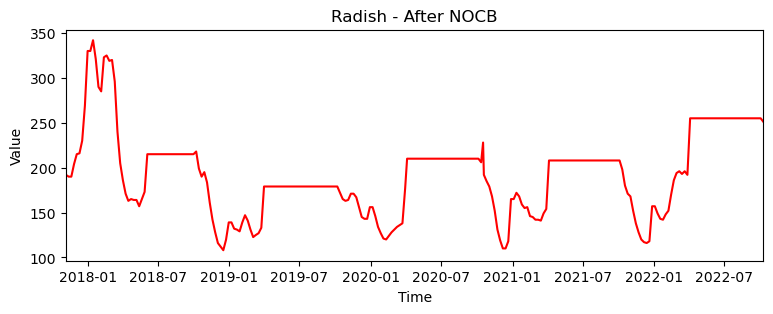

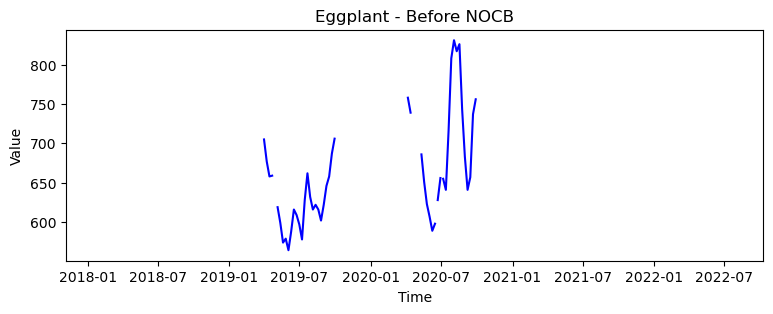

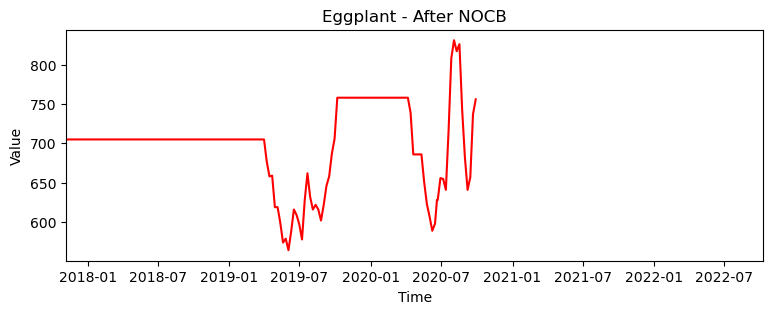

In [24]:
# For NOCB, I create a copy of original dataframe
df4 = df.copy()

for column in df4.columns:
    # set the size of our plot
    plt.rcParams['figure.figsize']=(9,3)
    
    # Determine the start and end dates of the time period that includes the missing values in a time series plot
    start_date = df4.index.min()
    end_date = df4.index.max()

    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    
    # plots our series
    plt.plot(df4[column], color='blue')
    
    # adds title to our time series plot
    plt.title(column + ' - Before NOCB') 
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # print the plot
    plt.show()
    
    
    
    # NOCB
    df4[column] = df4[column].fillna(method ='bfill')
    
    
    
    # pass the data and declared the colour of your curve, i.e., red
    plt.plot(df4[column], color='red')
    # add tittle to the plot
    plt.title(column + ' - After NOCB')
    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    # adds title to our time series plot
    plt.xlabel('Time')
    plt.ylabel('Value')
    # print the plot
    plt.show()

### 5. Linear Interpolation

- This technique originates from Numerical Analysis, which estimates unknown values by assuming linear relation within a range of data points, unlike linear extrapolation, which estimates data outside the range of the provided data points. To estimate the missing values using linear interpolation, we look at the past and the future data from the missing value.

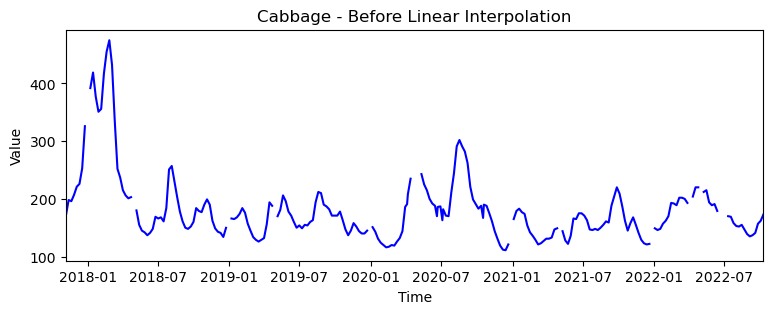

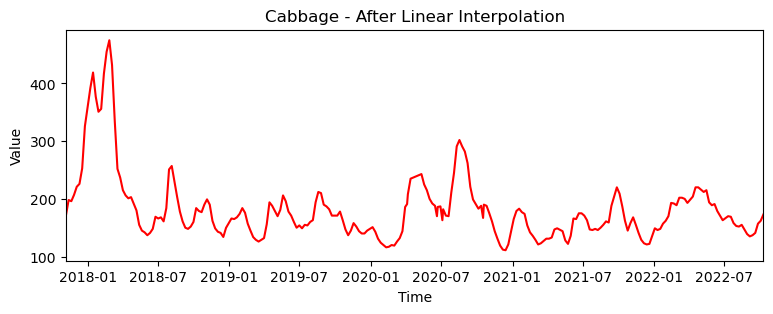

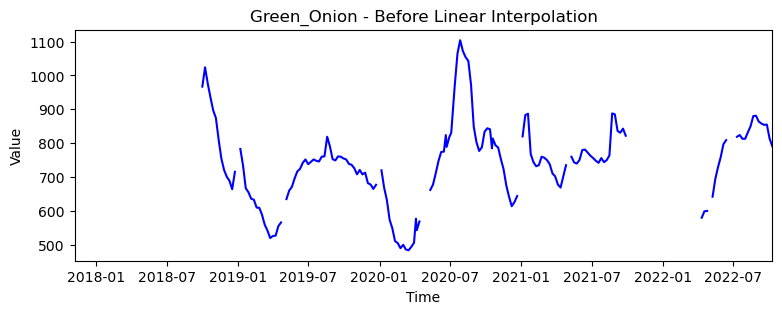

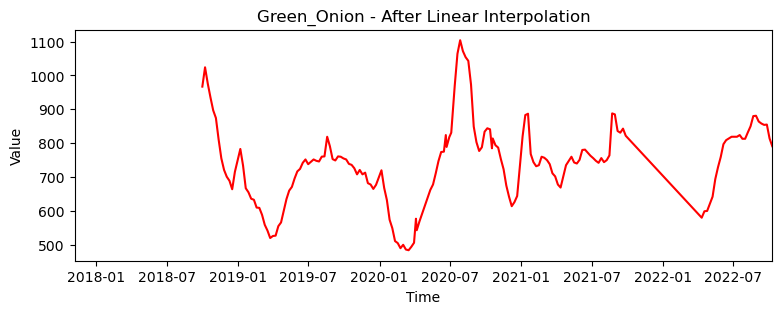

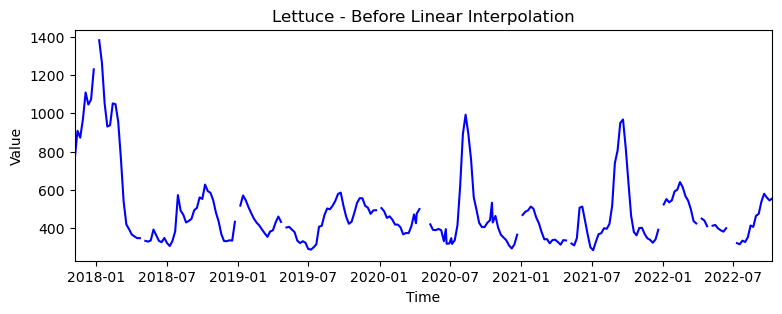

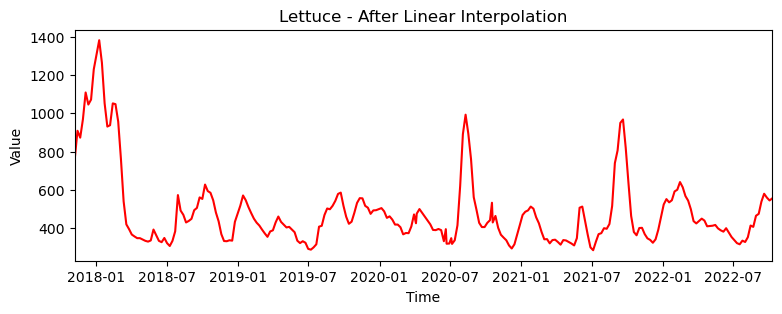

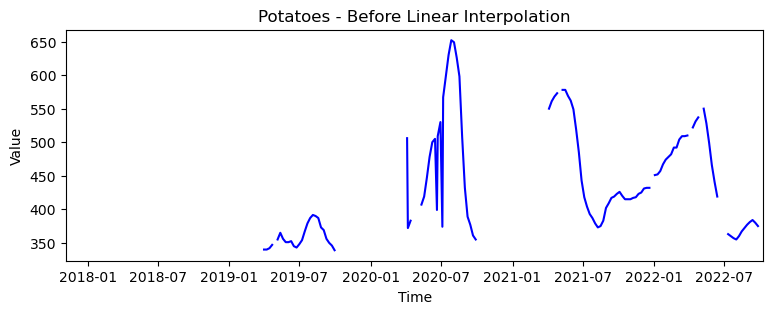

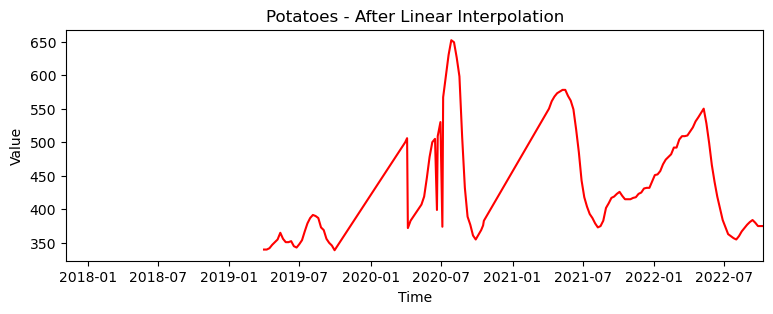

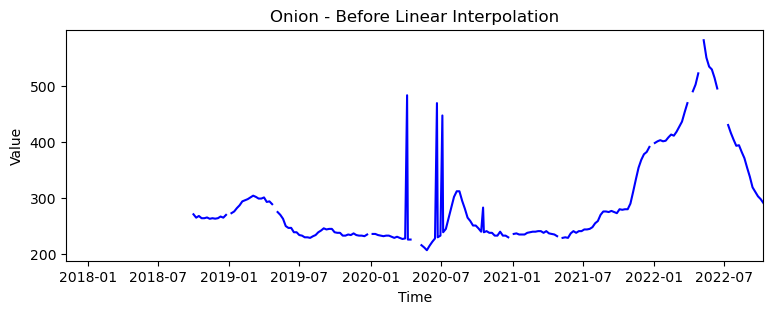

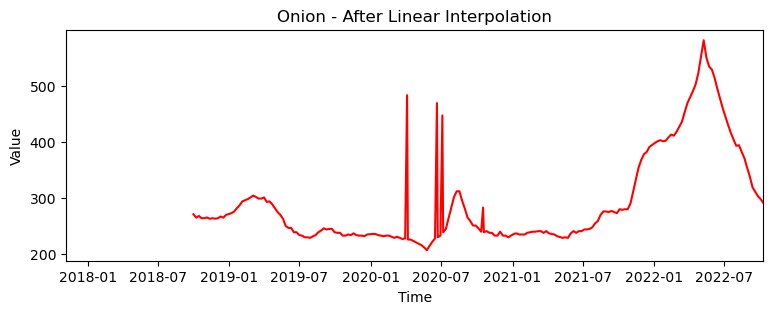

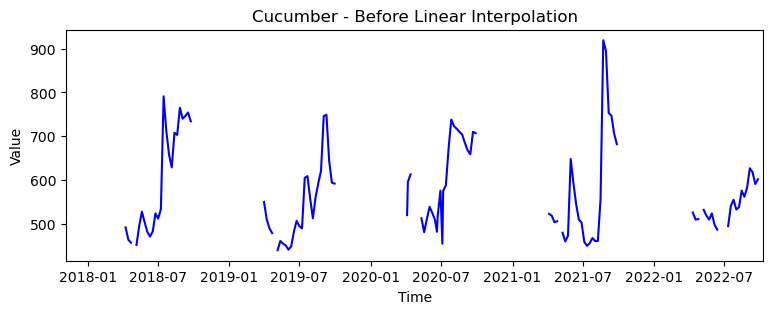

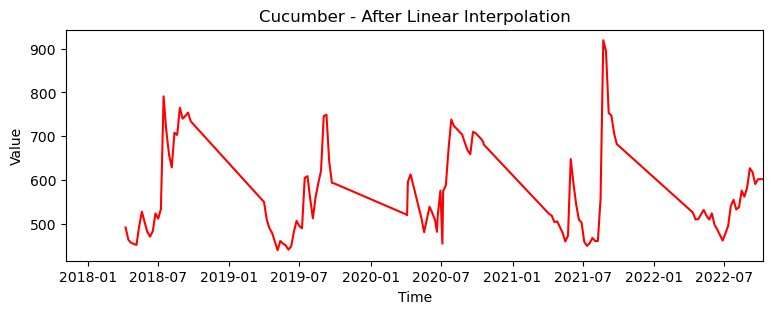

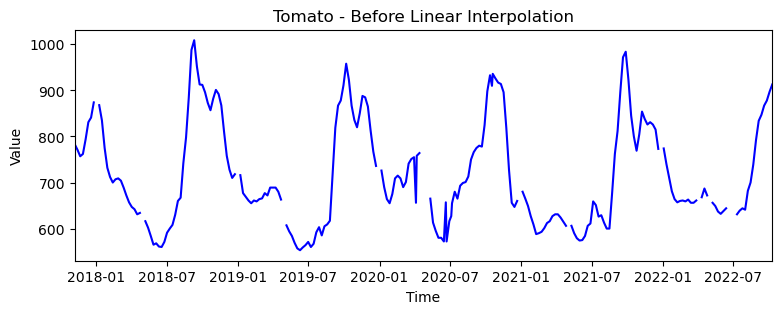

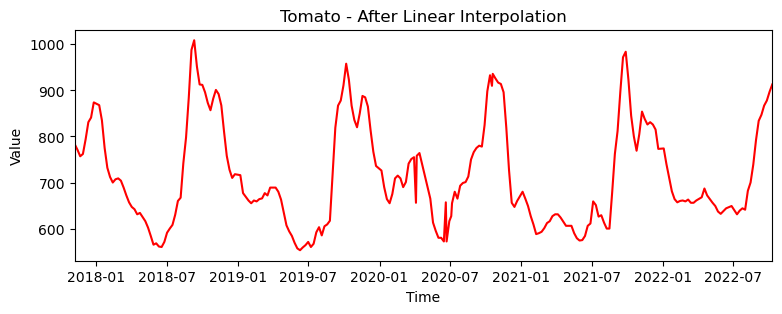

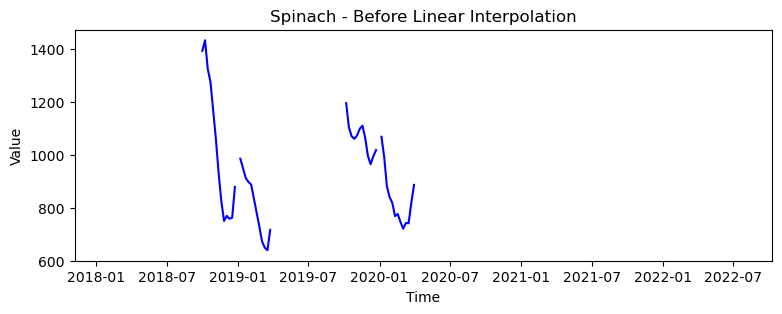

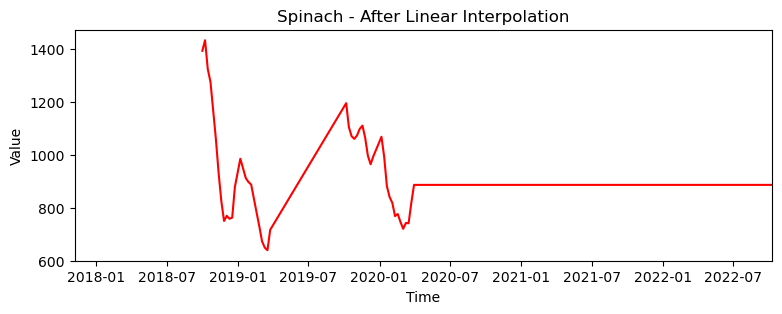

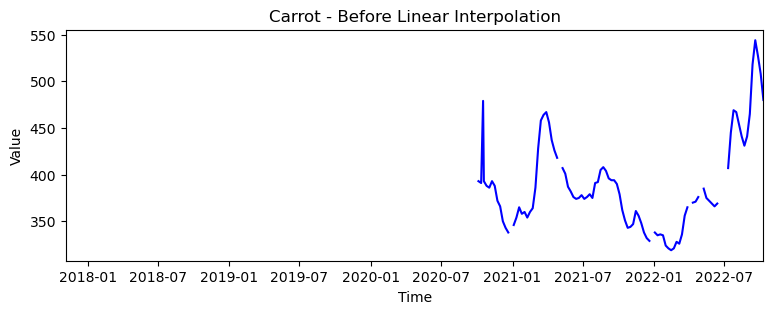

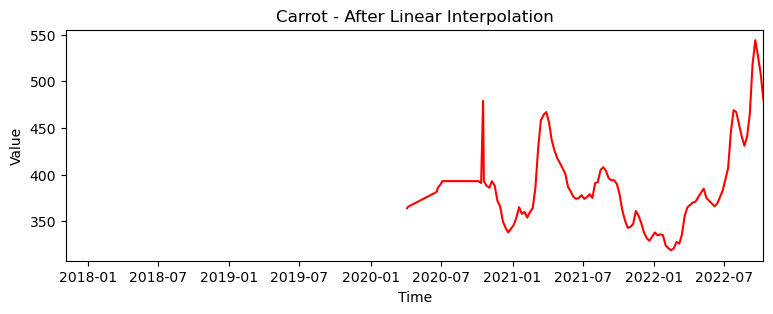

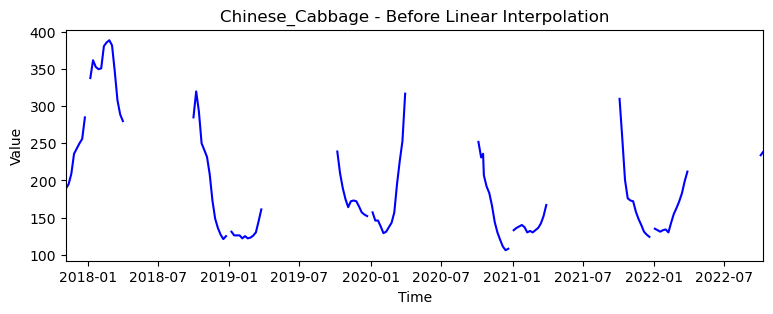

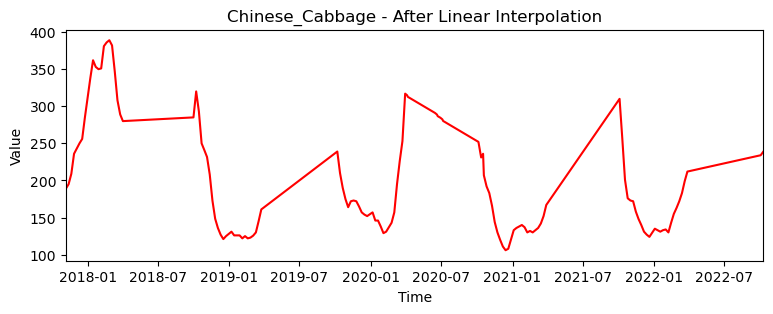

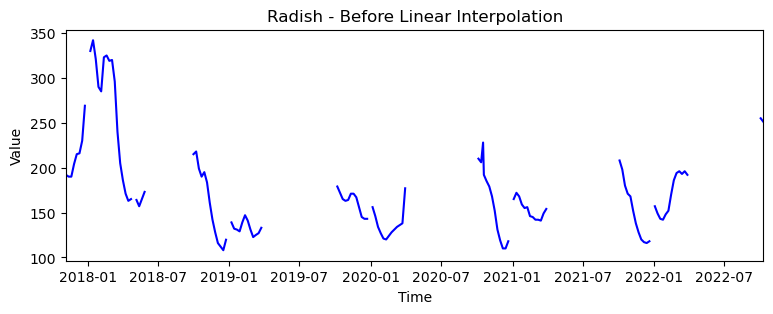

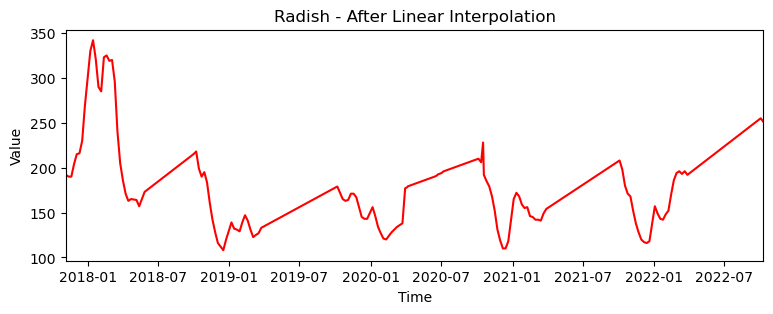

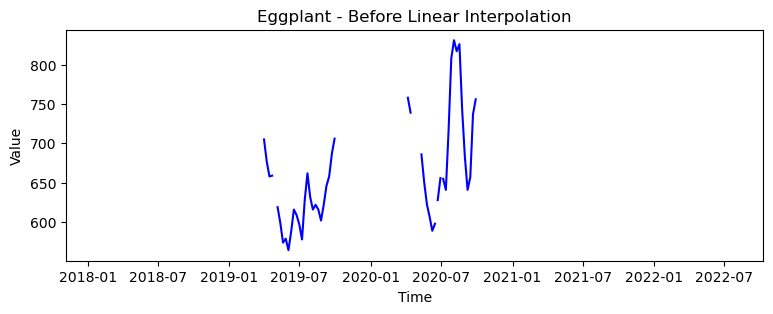

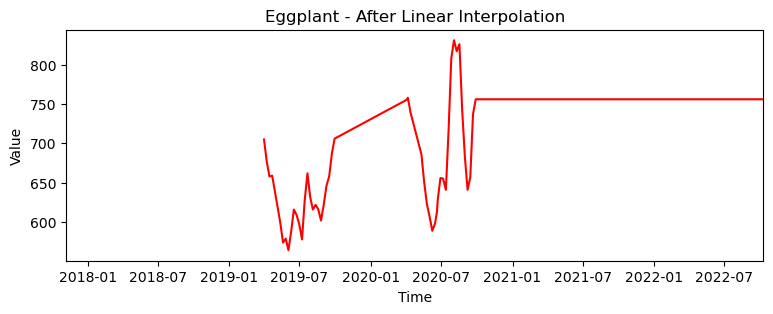

In [25]:
# For Linear Interpolation, I create a copy of original dataframe
df5 = df.copy()

for column in df5.columns:
    # set the size of our plot
    plt.rcParams['figure.figsize']=(9,3)
    
    # Determine the start and end dates of the time period that includes the missing values in a time series plot
    start_date = df5.index.min()
    end_date = df5.index.max()

    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    
    # plots our series
    plt.plot(df5[column], color='blue')
    
    # adds title to our time series plot
    plt.title(column + ' - Before Linear Interpolation') 
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # print the plot
    plt.show()
    
    
    
    
    # Linear Interpolation
    df5[column] = df5[column].interpolate(method='linear')
    
    
    
    # pass the data and declared the colour of your curve, i.e., red
    plt.plot(df5[column], color='red')
    # add tittle to the plot
    plt.title(column + ' - After Linear Interpolation')
    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    # adds title to our time series plot
    plt.xlabel('Time')
    plt.ylabel('Value')
    # print the plot
    plt.show()

### 6. Polynomial Interpolation

- Polynomial interpolation is a method of estimating the value of a variable by fitting a polynomial curve to a set of data points. It can be used to interpolate new values along the curve.

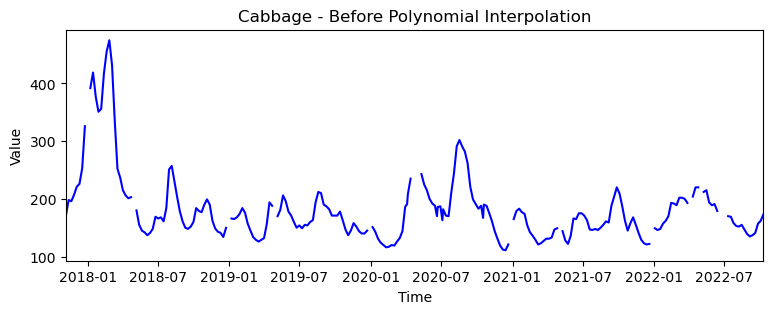

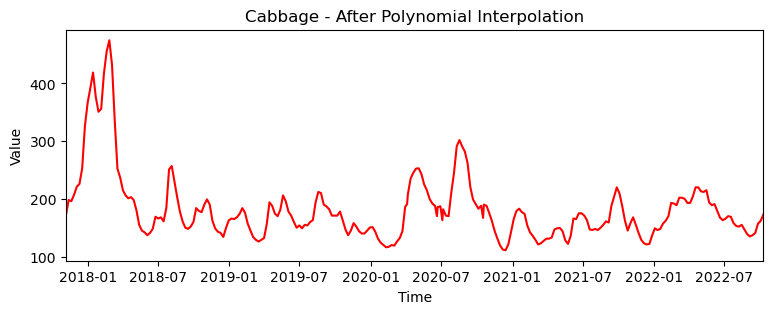

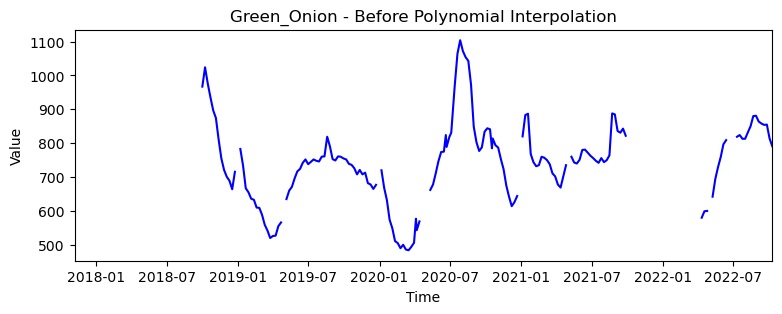

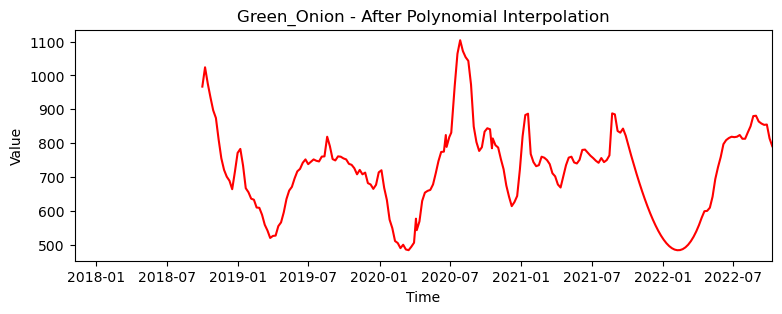

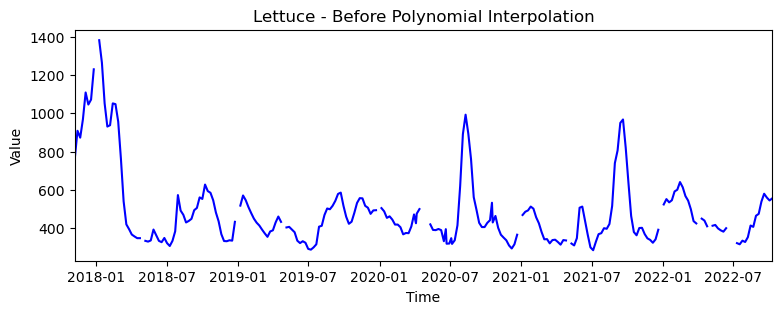

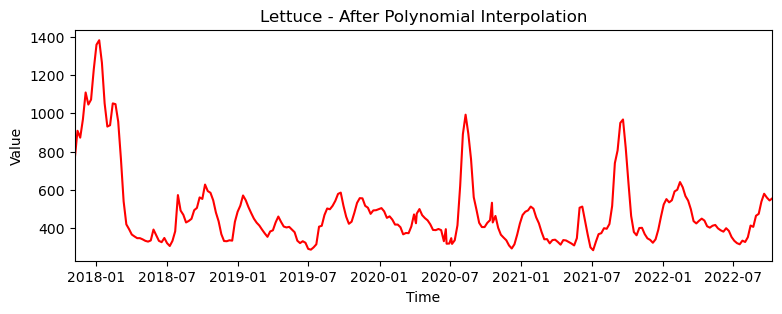

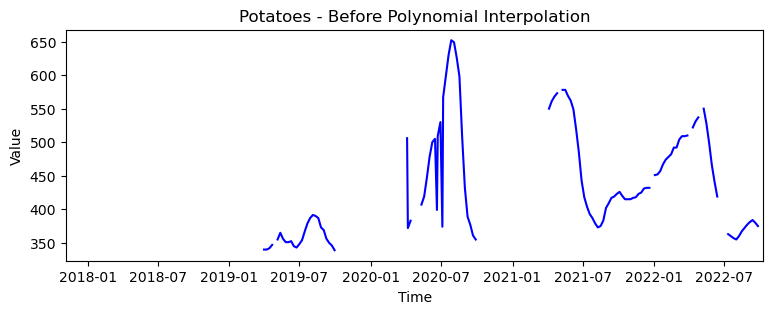

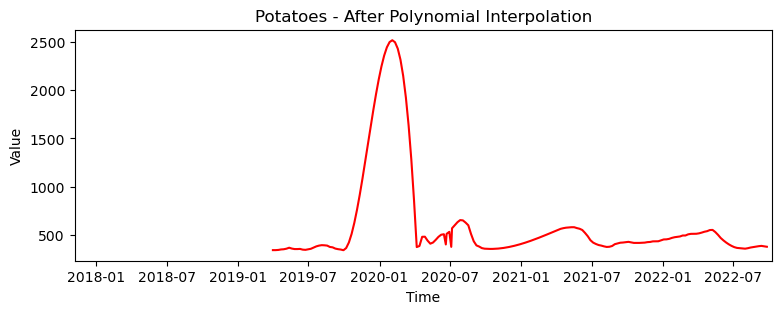

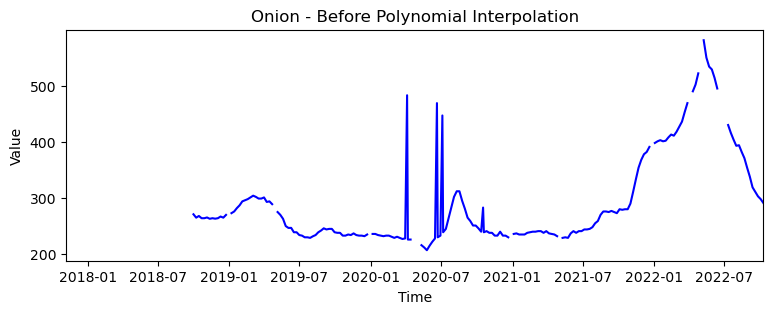

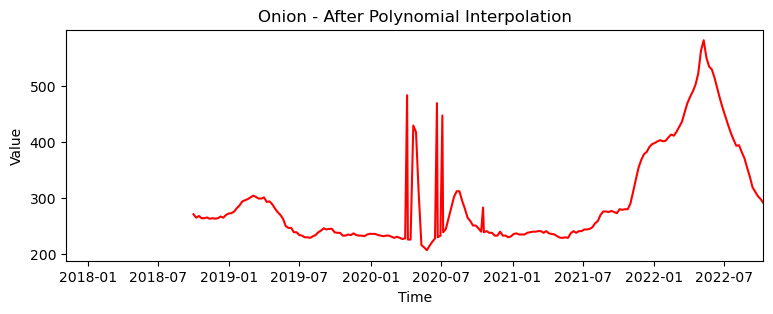

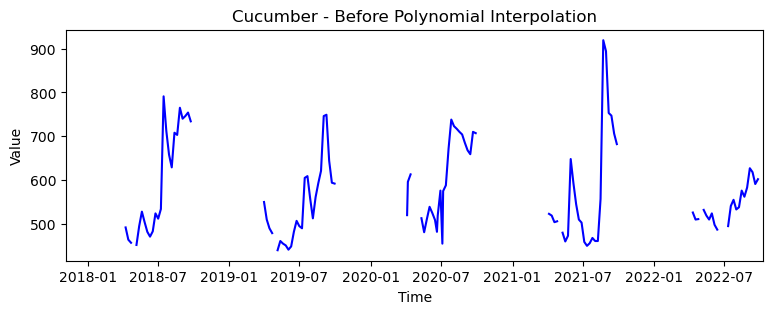

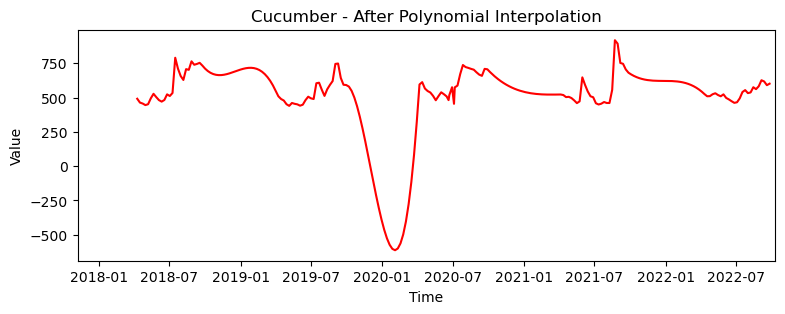

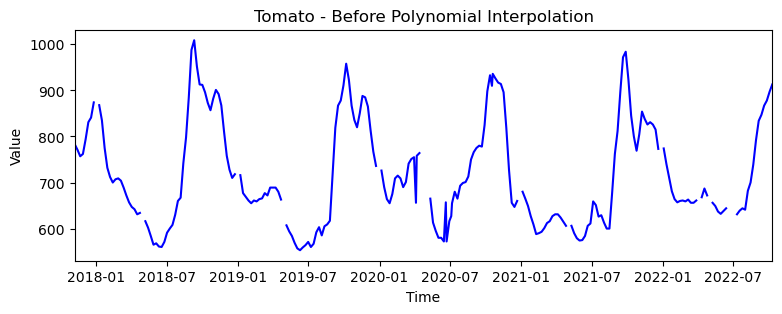

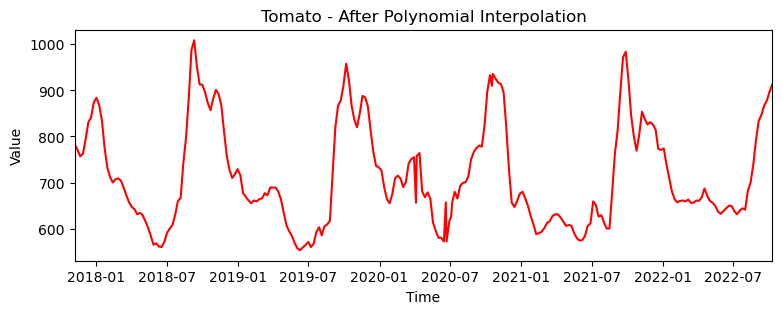

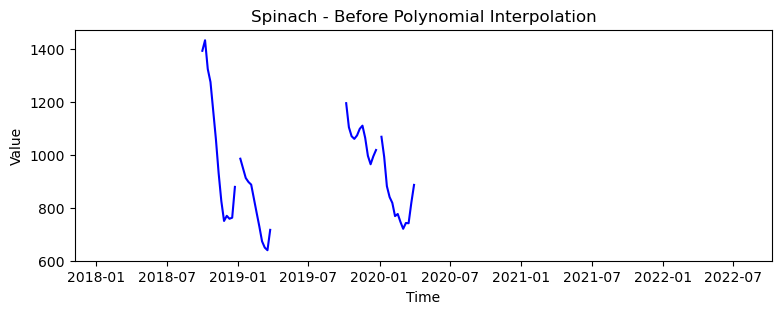

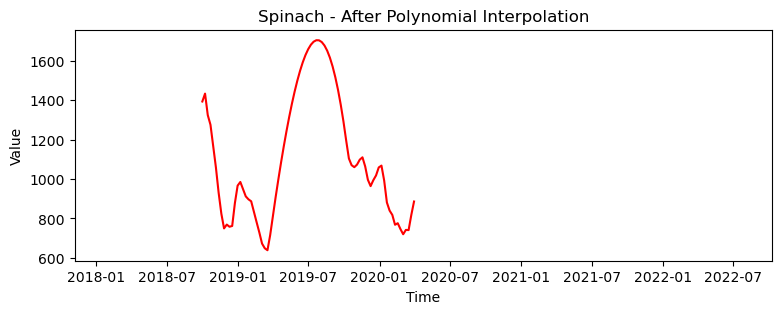

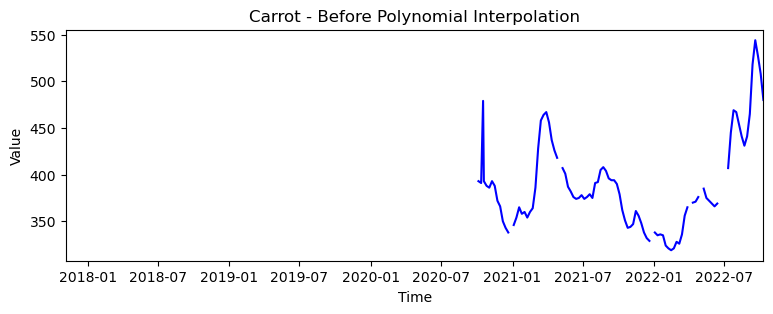

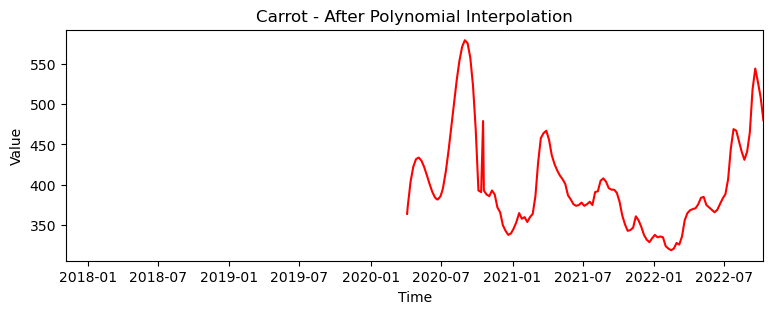

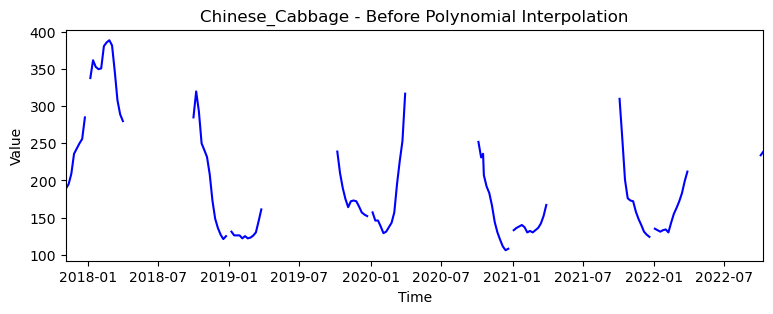

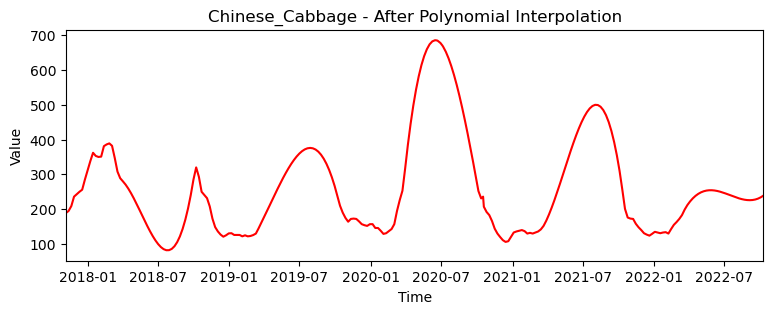

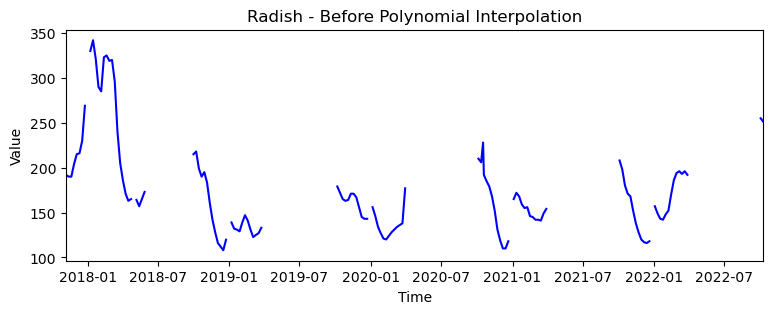

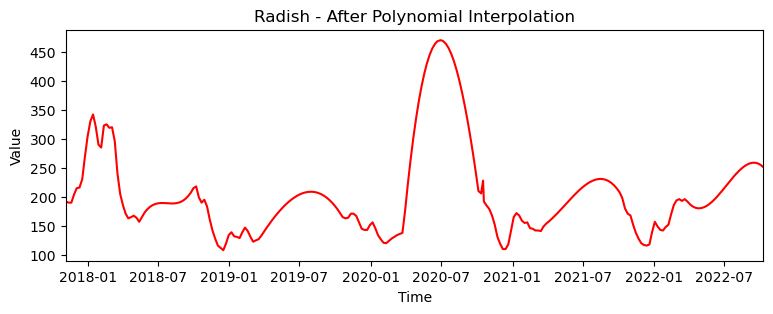

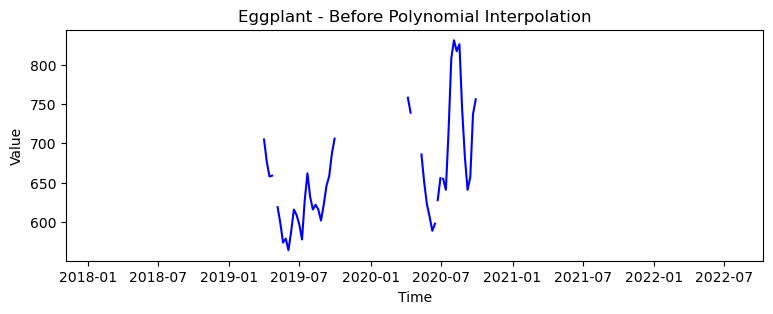

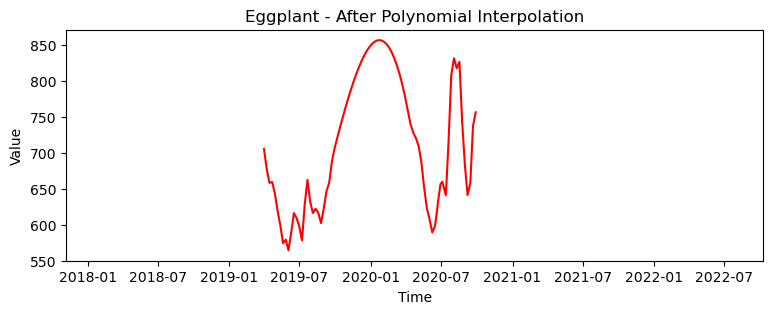

In [26]:
# For Polynomial interpolation, I create a copy of original dataframe
df6 = df.copy()

for column in df5.columns:
    # set the size of our plot
    plt.rcParams['figure.figsize']=(9,3)
    
    # Determine the start and end dates of the time period that includes the missing values in a time series plot
    start_date = df6.index.min()
    end_date = df6.index.max()

    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    
    # plots our series
    plt.plot(df6[column], color='blue')
    
    # adds title to our time series plot
    plt.title(column + ' - Before Polynomial Interpolation') 
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # print the plot
    plt.show()
    
    
    
    # Polynomial interpolation
    df6[column] = df6[column].interpolate(method='cubic')
    
    
    
    # pass the data and declared the colour of your curve, i.e., red
    plt.plot(df6[column], color='red')
    # add tittle to the plot
    plt.title(column + ' - After Polynomial Interpolation')
    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    # adds title to our time series plot
    plt.xlabel('Time')
    plt.ylabel('Value')
    # print the plot
    plt.show()

- `Cabbage`: LOCF, NOCB, LI, PI
- `Green_Onion`: Mean, Median, PI
- `Lettuce`: LOCF, NOCB, LI, PI
- `Potatoes`:  NOCB,
- `Onion`: LOCF, NOCB, LI,
- `Cucumber`: Mean, Median, LOCF,
- `Tomato`: LOCF, NOCB, LI, PI
- `Spinach`: Mean,Median, PI
- `Carrot`: Mean,Median, LOCF, NOCB, LI,
- `Chinese_Cabbage`: LOCF, NOCB, LI
- `Radish`:  NOCB,
-  `Eggplant`: Mean,Median, PI

### - Applying Chosen Methods to Fill Out Missing Values

- `Cabbage`: LOCF*
- `Green_Onion`: PI* (+ median imputation for initials)
- `Lettuce`: NOCB*
- `Potatoes`:  LI* (+ NOCB for initials)
- `Onion`: NOCB*
- `Cucumber`: LI* (+ mean imputation for initials)
- `Tomato`: PI*
- `Spinach`: ???
- `Carrot`: ???
- `Chinese_Cabbage`: LI*
- `Radish`:  LI*
-  `Eggplant`: ???

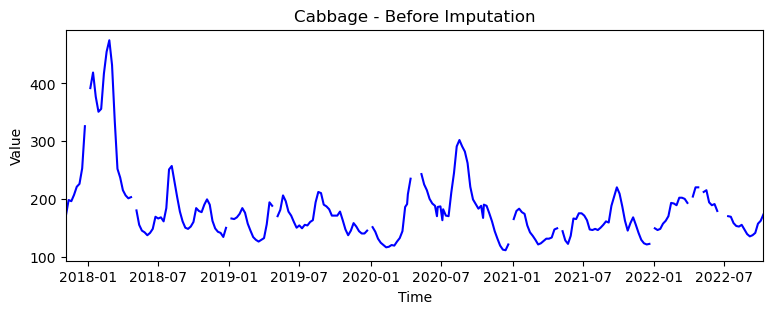

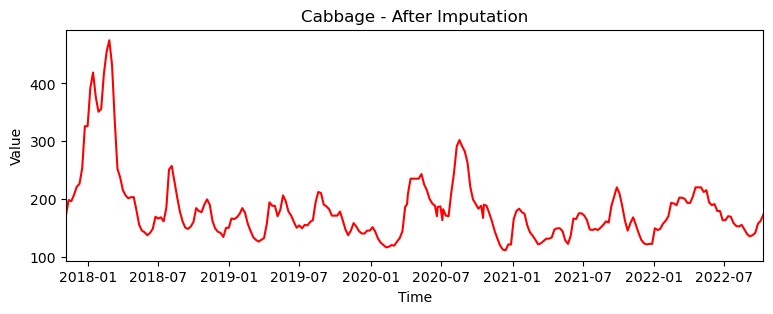

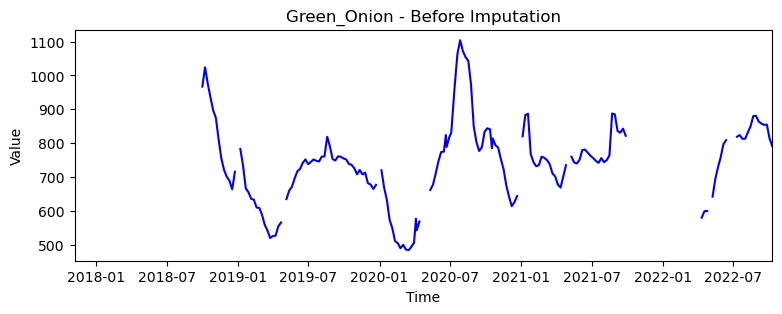

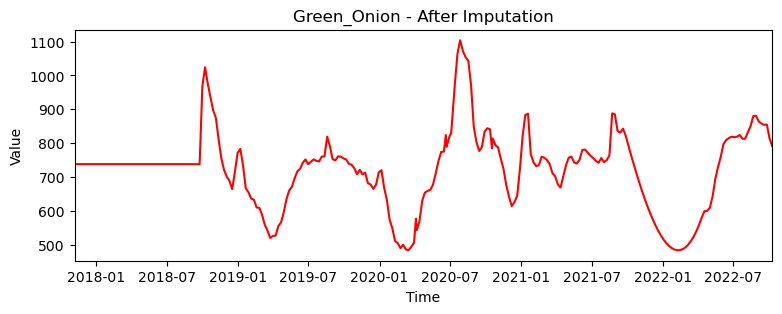

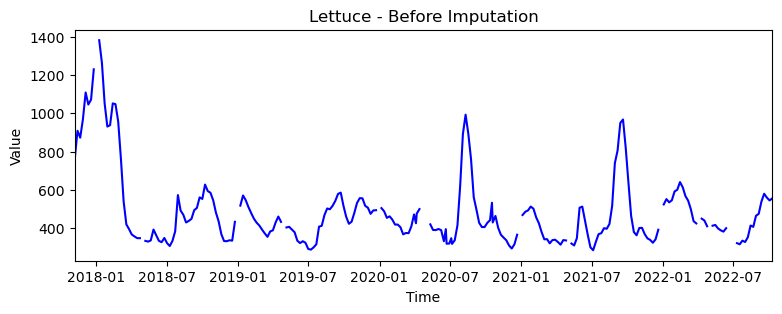

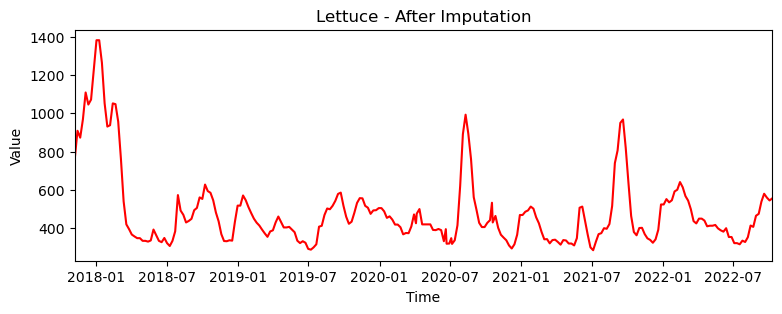

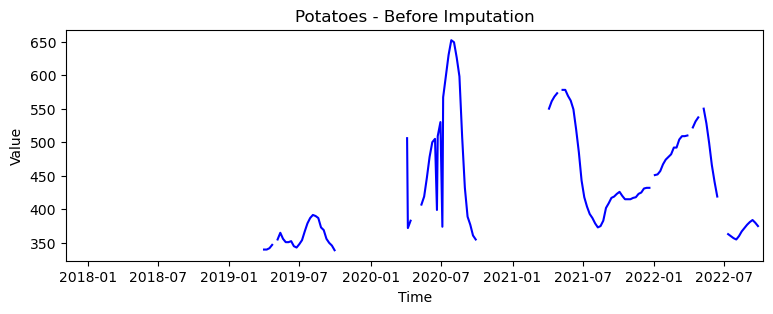

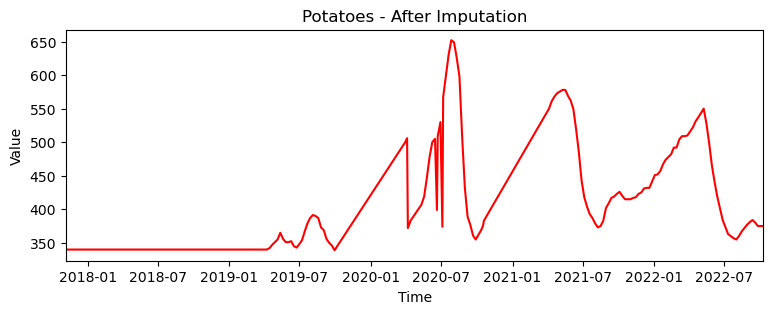

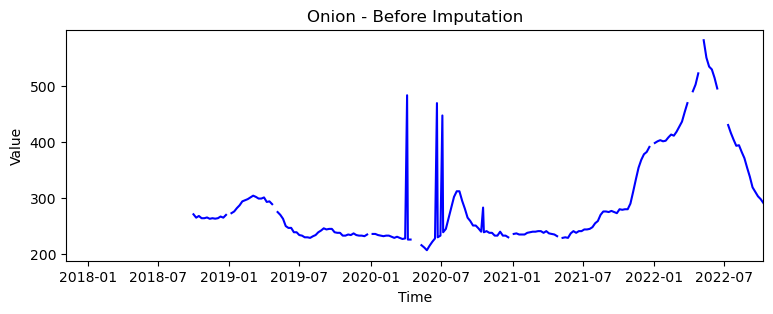

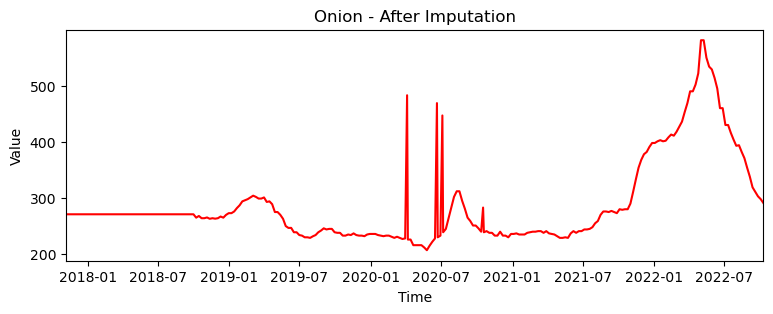

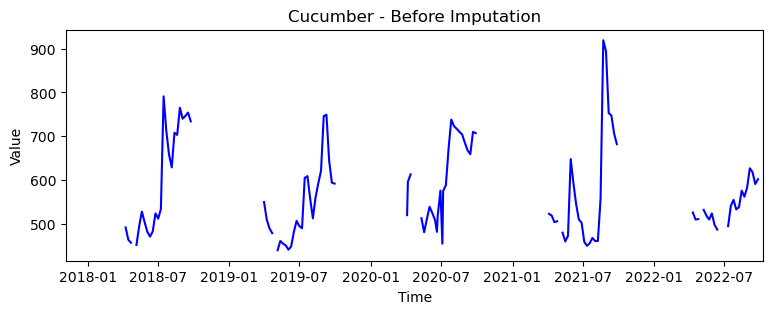

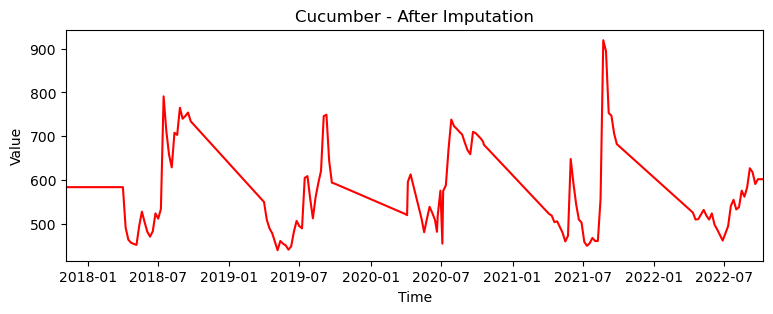

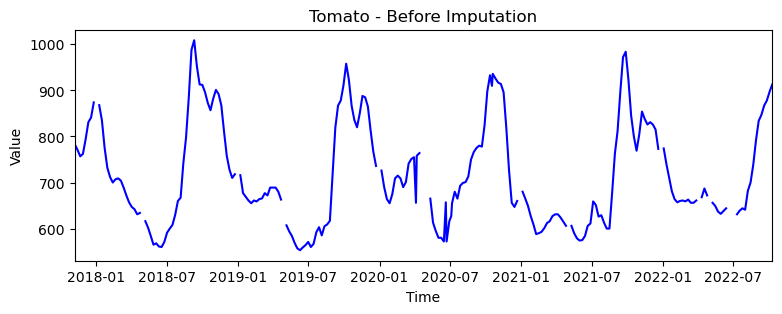

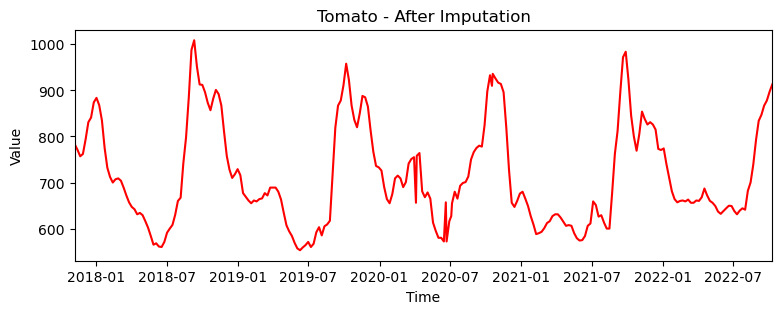

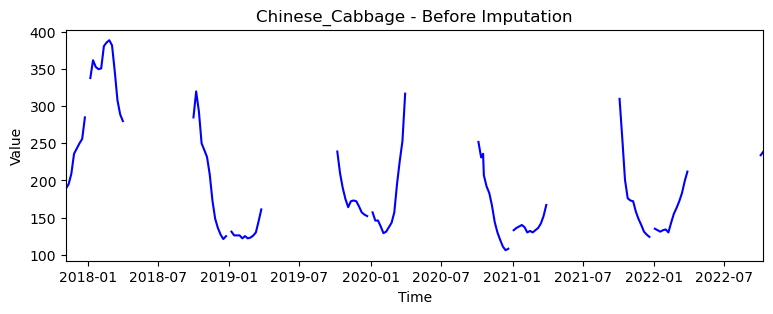

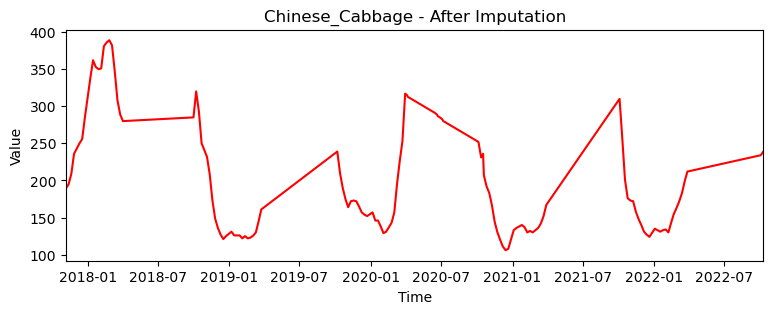

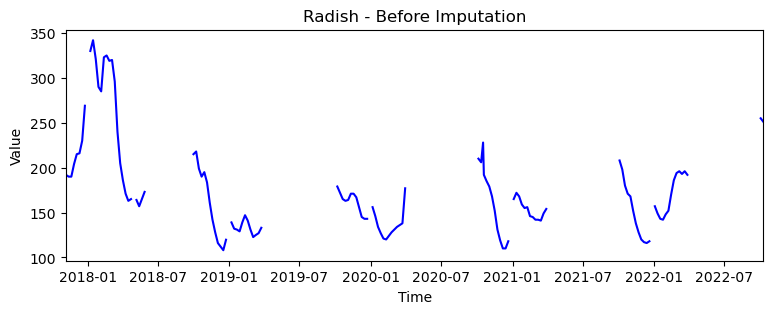

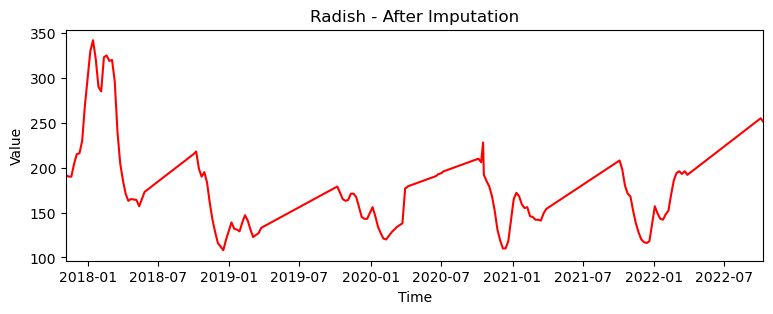

In [27]:
# Drop 'Spinach', 'Eggplant', and 'Carrot'
df = df.drop(['Spinach', 'Eggplant', 'Carrot'], axis=1)

for column in df.columns:
    # set the size of our plot
    plt.rcParams['figure.figsize']=(9,3)
    
    # Determine the start and end dates of the time period that includes the missing values in a time series plot
    start_date = df.index.min()
    end_date = df.index.max()

    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    
    # plots our series
    plt.plot(df[column], color='blue')
    
    # adds title to our time series plot
    plt.title(column + ' - Before Imputation') 
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # print the plot
    plt.show()
    
    
    # For LOCF
    if column == 'Cabbage':
        df[column] = df[column].fillna(method ='ffill')
    
    
    # List of column names to apply NOCB
    column_names = ['Lettuce', 'Onion']
    if column in column_names:
      df[column] = df[column].fillna(method ='bfill')
    
    
    # List of column names to apply LI
    column_names = ['Chinese_Cabbage', 'Radish', 'Cucumber', 'Potatoes']  
    if column in column_names:
        df[column] = df[column].interpolate(method='linear')
        if column == 'Cucumber':
            # For Cucumber
            mean_value = df[column].mean()
            df[column] = df[column].fillna(mean_value)
        if column == 'Potatoes':
            # For Potatoes
            df[column] = df[column].fillna(method ='bfill')   
        
    # List of column names to apply PI
    column_names = ['Green_Onion', 'Tomato']  
    if column in column_names:
        df[column] = df[column].interpolate(method='cubic')
        if column == 'Green_Onion':
            # For Green Onion
            median_greOnion = df[column].median()
            df[column] = df[column].fillna(median_greOnion)

    # pass the data and declared the colour of your curve, i.e., red
    plt.plot(df[column], color='red')
    # add tittle to the plot
    plt.title(column + ' - After Imputation')
    # Set the range of the x-axis to the time period
    plt.xlim(start_date, end_date)
    # adds title to our time series plot
    plt.xlabel('Time')
    plt.ylabel('Value')
    # print the plot
    plt.show()

In [28]:
#Checking Missing Values After Imputation:

df.isna().sum()

Cabbage            0
Green_Onion        0
Lettuce            0
Potatoes           0
Onion              0
Cucumber           0
Tomato             0
Chinese_Cabbage    0
Radish             0
dtype: int64

In [29]:
# Round the values in the dataframe to 1 decimal place
df = df.round(1)

# Print the dataframe
df

Cabbage  Green_Onion  Lettuce  Potatoes  Onion  Cucumber  Tomato  \
2017-11-06    171.0        738.0    763.0     340.0  271.0     583.9   783.0   
2017-11-13    198.0        738.0    909.0     340.0  271.0     583.9   771.0   
2017-11-20    196.0        738.0    873.0     340.0  271.0     583.9   757.0   
2017-11-27    207.0        738.0    969.0     340.0  271.0     583.9   762.0   
2017-12-04    221.0        738.0   1109.0     340.0  271.0     583.9   794.0   
...             ...          ...      ...       ...    ...       ...     ...   
2022-09-12    137.0        858.0    539.0     384.0  319.0     618.0   847.0   
2022-09-19    141.0        854.0    580.0     380.0  311.0     591.0   867.0   
2022-09-26    157.0        855.0    560.0     375.0  303.0     602.0   878.0   
2022-10-03    162.0        814.0    545.0     375.0  298.0     602.0   897.0   
2022-10-10    173.0        791.0    556.0     375.0  291.0     602.0   913.0   

            Chinese_Cabbage  Radish  
2017-11-06            189.0   192.0  
2017-11-13            195.0   190.0  
2017-11-20            209.0   190.0  
2017-11-27            236.0   204.0  
2017-12-04            243.0   215.0  
...                     ...     ...  
2022-09-12            231.6   248.0  
2022-09-19            232.4   250.3  
2022-09-26            233.2   252.7  
2022-10-03            234.0   255.0  
2022-10-10            239.0   251.0  

[262 rows x 9 columns]

In [32]:
print('Shape of the data', df.shape)
df

Shape of the data (262, 9)


Cabbage  Green_Onion  Lettuce  Potatoes  Onion  Cucumber  Tomato  \
2017-11-06    171.0        738.0    763.0     340.0  271.0     583.9   783.0   
2017-11-13    198.0        738.0    909.0     340.0  271.0     583.9   771.0   
2017-11-20    196.0        738.0    873.0     340.0  271.0     583.9   757.0   
2017-11-27    207.0        738.0    969.0     340.0  271.0     583.9   762.0   
2017-12-04    221.0        738.0   1109.0     340.0  271.0     583.9   794.0   
...             ...          ...      ...       ...    ...       ...     ...   
2022-09-12    137.0        858.0    539.0     384.0  319.0     618.0   847.0   
2022-09-19    141.0        854.0    580.0     380.0  311.0     591.0   867.0   
2022-09-26    157.0        855.0    560.0     375.0  303.0     602.0   878.0   
2022-10-03    162.0        814.0    545.0     375.0  298.0     602.0   897.0   
2022-10-10    173.0        791.0    556.0     375.0  291.0     602.0   913.0   

            Chinese_Cabbage  Radish  
2017-11-06            189.0   192.0  
2017-11-13            195.0   190.0  
2017-11-20            209.0   190.0  
2017-11-27            236.0   204.0  
2017-12-04            243.0   215.0  
...                     ...     ...  
2022-09-12            231.6   248.0  
2022-09-19            232.4   250.3  
2022-09-26            233.2   252.7  
2022-10-03            234.0   255.0  
2022-10-10            239.0   251.0  

[262 rows x 9 columns]

In [31]:
df.to_csv('dataframe.csv')

In [36]:
for index in df.index:
    print(index)

2017-11-06 00:00:00
2017-11-13 00:00:00
2017-11-20 00:00:00
2017-11-27 00:00:00
2017-12-04 00:00:00
2017-12-11 00:00:00
2017-12-18 00:00:00
2017-12-25 00:00:00
2018-01-01 00:00:00
2018-01-08 00:00:00
2018-01-15 00:00:00
2018-01-22 00:00:00
2018-01-29 00:00:00
2018-02-05 00:00:00
2018-02-12 00:00:00
2018-02-19 00:00:00
2018-02-26 00:00:00
2018-03-05 00:00:00
2018-03-12 00:00:00
2018-03-19 00:00:00
2018-03-26 00:00:00
2018-04-02 00:00:00
2018-04-09 00:00:00
2018-04-16 00:00:00
2018-04-23 00:00:00
2018-04-30 00:00:00
2018-05-07 00:00:00
2018-05-14 00:00:00
2018-05-21 00:00:00
2018-05-28 00:00:00
2018-06-04 00:00:00
2018-06-11 00:00:00
2018-06-18 00:00:00
2018-06-25 00:00:00
2018-07-02 00:00:00
2018-07-09 00:00:00
2018-07-16 00:00:00
2018-07-23 00:00:00
2018-07-30 00:00:00
2018-08-06 00:00:00
2018-08-13 00:00:00
2018-08-20 00:00:00
2018-08-27 00:00:00
2018-09-03 00:00:00
2018-09-10 00:00:00
2018-09-17 00:00:00
2018-09-24 00:00:00
2018-10-01 00:00:00
2018-10-08 00:00:00
2018-10-15 00:00:00
